# Investigation of Methane Activation over NiO/CZ using in-situ FTIR Spectroscopy

# Import Packages and Pre-Defined Functions

## Define fitting functions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lmfit import minimize, Parameters, report_fit, Minimizer
import time
from sklearn.metrics import r2_score
from ipynb.fs.full.functions import get_first_nbr_from_str, baseline_als, Data_import

In [2]:
from ipynb.fs.full.functions import Voigt, Gaussian
from ipynb.fs.full.functions import Generate_data, Generate_params, loss_func, Plot_data, Plot_com_data, Final_plot, Print_var, Final_print
from ipynb.fs.full.functions import Generate_Vec_IG, Generate_data_IG, loss_func_IG, Generate_params_IG, Plot_data_IG, Plot_com_data_IG

In [3]:
import seaborn as sns

# Test on the real data set

## Import data
Import data from '20200914_cleaned.xlsx'. Import the difference data and accumulation data.

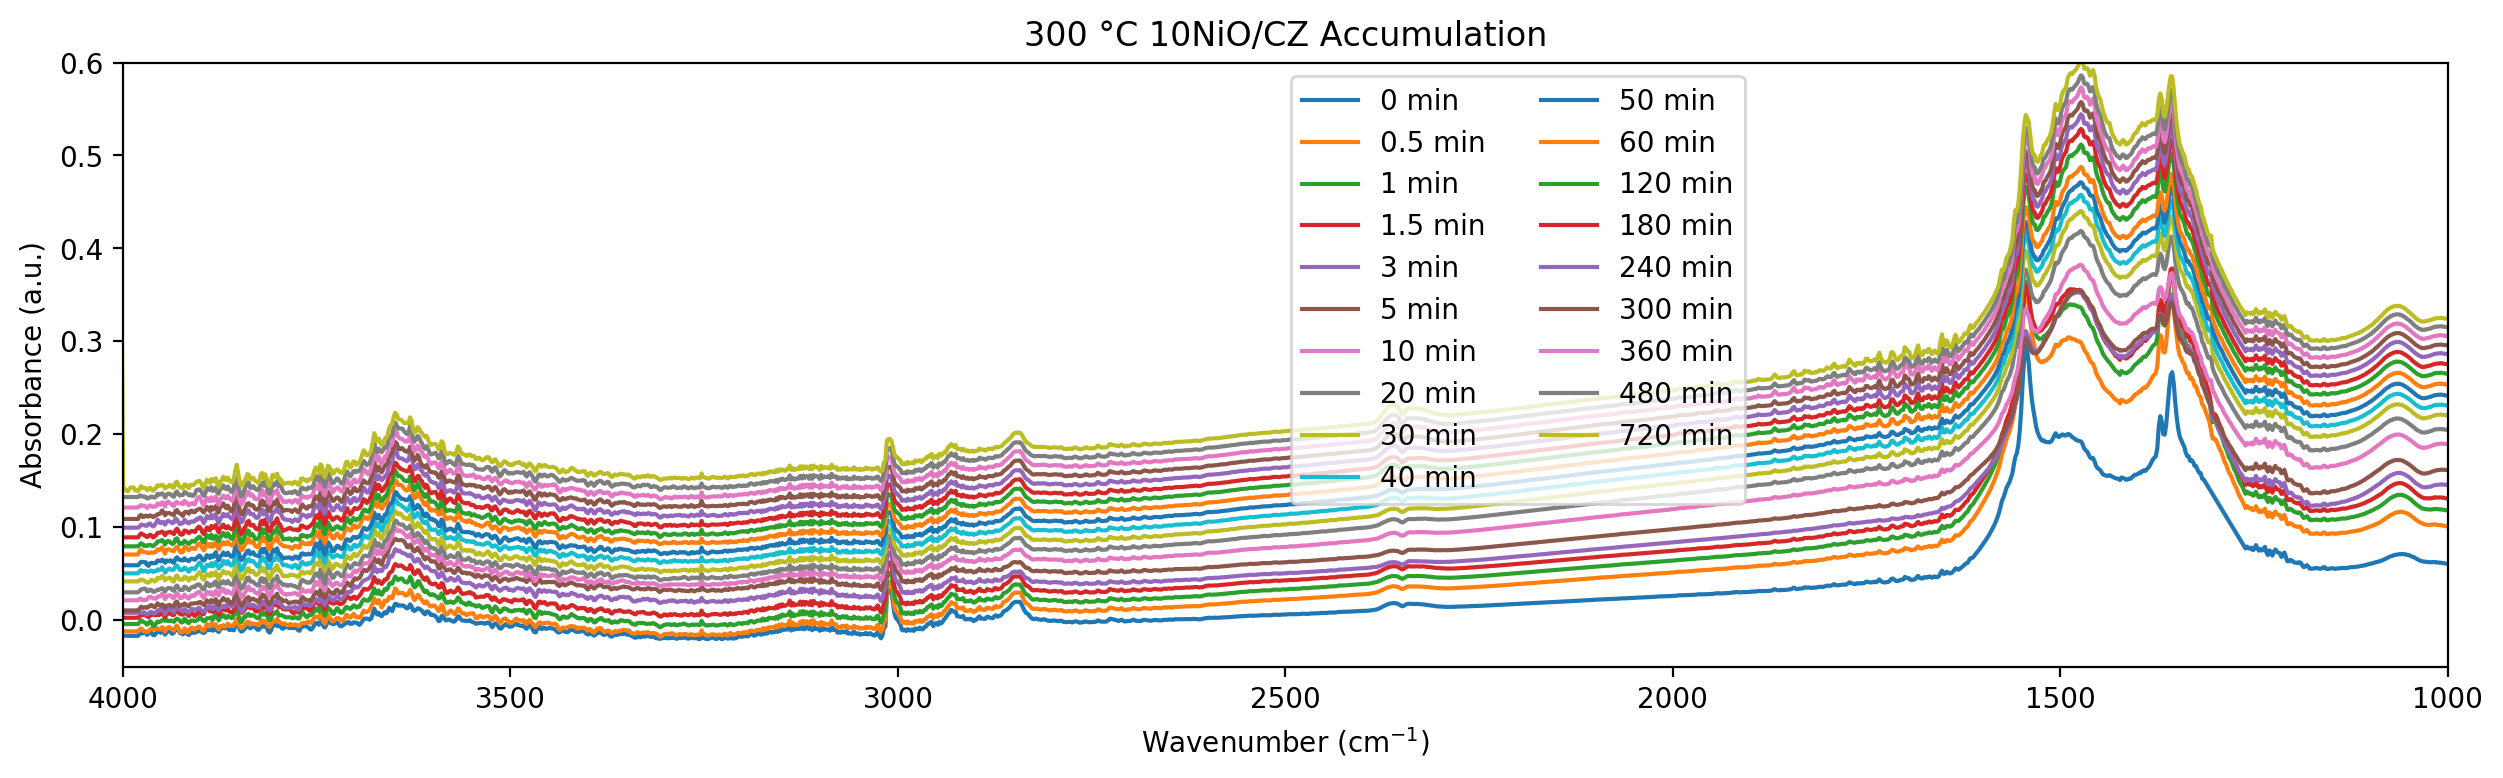

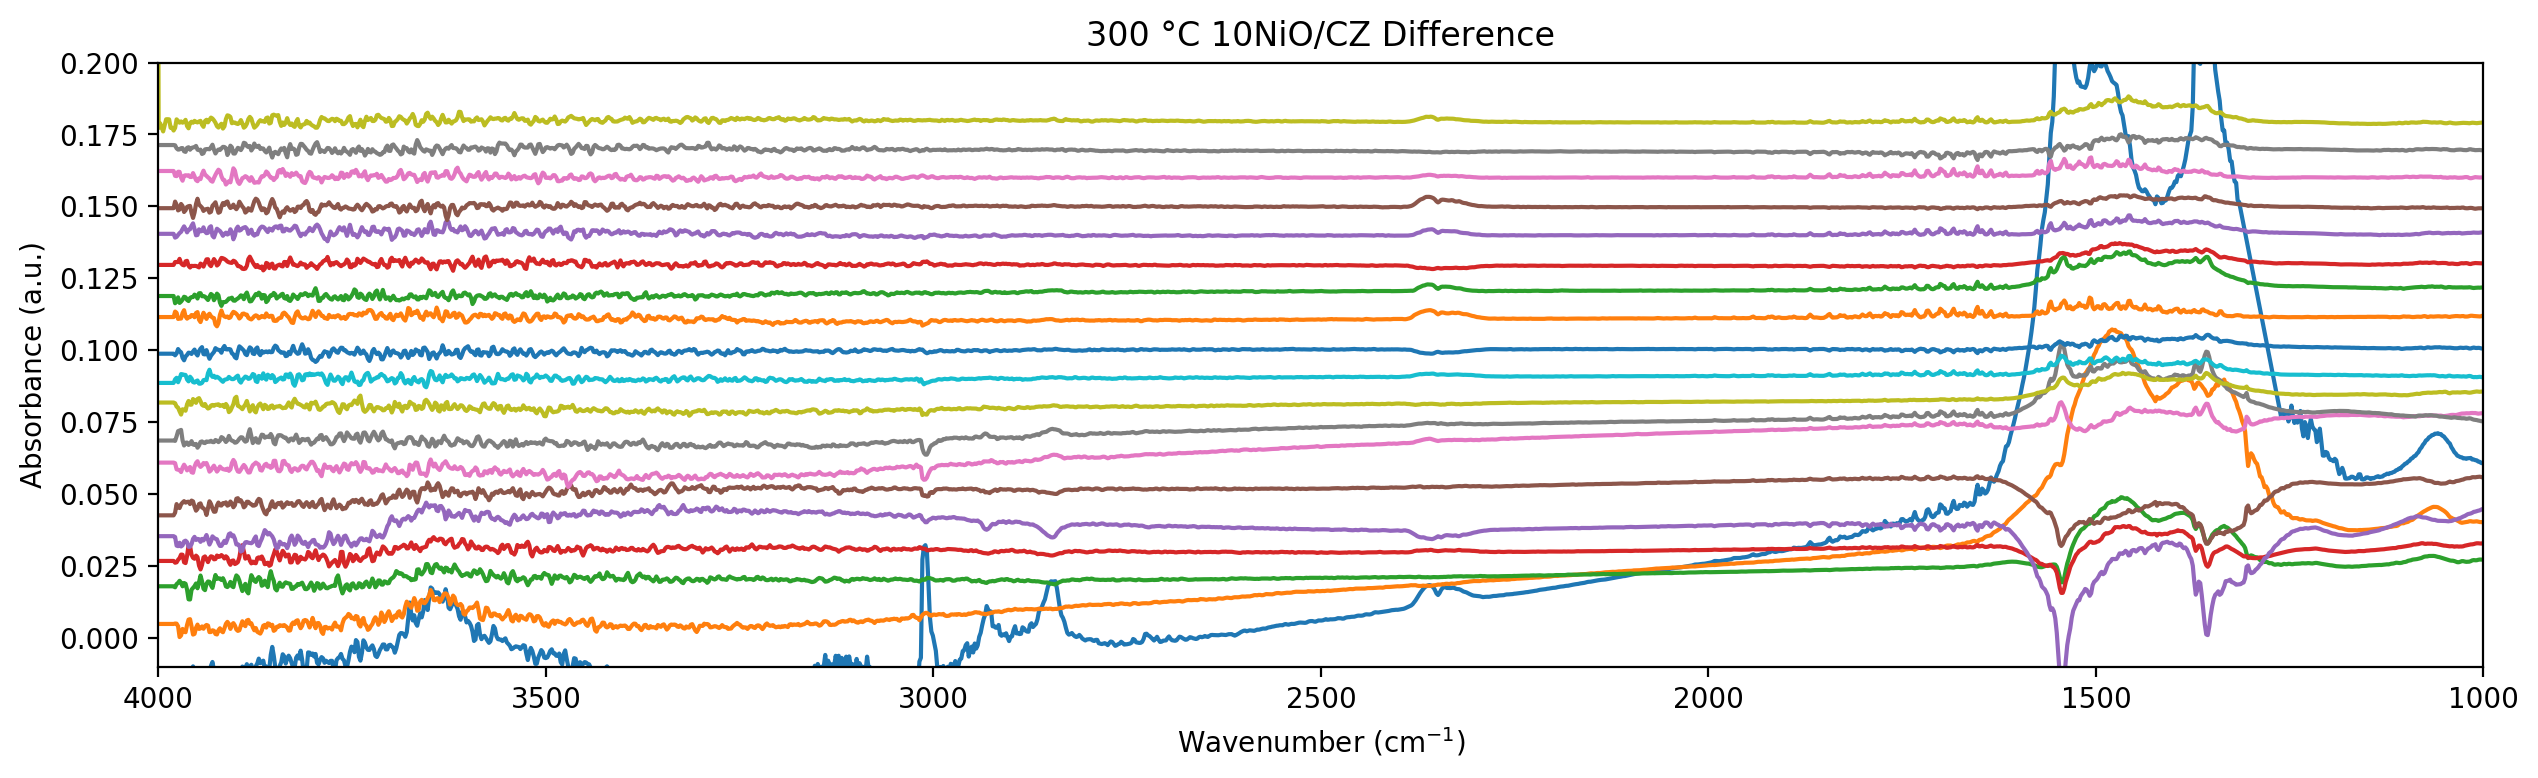

In [4]:
df = pd.read_excel (r'data/20200914_cleaned.xlsx',sheet_name='dif')
dif = df[df.columns[1:]]
df = pd.read_excel (r'data/20200914_cleaned.xlsx',sheet_name='acu')
acu = df[df.columns[1:]]
column_num = np.shape(df)[1]
sns.color_palette(n_colors = column_num)
Index = 1
Tem = 300
Sample = '10NiO/CZ'
fig, ax = plt.subplots(1,1,figsize = (15,4),dpi=200)
ADF = 0.01
DDF = 0.01
for i in range(Index+1,column_num):
    ax.plot(acu[acu.columns[0]],acu[df.columns[i]]+ ADF*(i-Index-1),label=df.columns[i])
ax.set_ylim((-0.05,0.6))
ax.set_xlim(1000,4000)
ax.set_xlabel('Wavenumber (cm$^{-1}$)')
ax.set_ylabel('Absorbance (a.u.)')
ax.set_title('{} \xb0C {} Accumulation'.format(Tem, Sample))
ax.invert_xaxis()
ax.legend(loc='upper center', bbox_to_anchor=(0.6, 1.00), ncol=2)
    
fig, ax = plt.subplots(1,1,figsize = (15,4),dpi=200)
for i in range(Index+1,column_num):
    ax.plot(dif[dif.columns[0]],dif[df.columns[i]]+ DDF*(i-Index-1),label=df.columns[i])
ax.set_ylim((-0.01,0.2))
ax.set_xlim(1000,4000)
ax.set_xlabel('Wavenumber (cm$^{-1}$)')
ax.set_ylabel('Absorbance (a.u.)')
ax.set_title('{} \xb0C {} Difference'.format(Tem, Sample))
ax.invert_xaxis()

## Process Data by Region

0.5
1.0
5.0
10.0
20.0
30.0
40.0
60.0
180.0
300.0
360.0
The fitted region started at 2809.82 cm-1, and ended at 2981.457 cm-1.


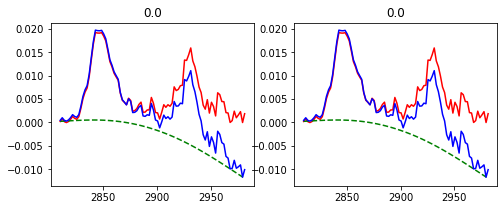

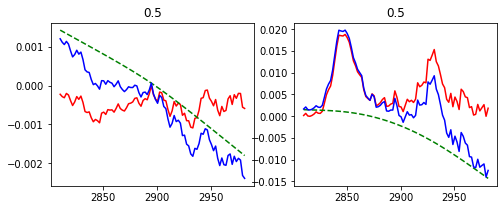

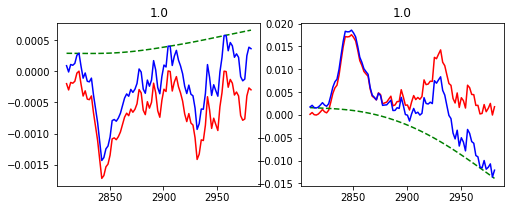

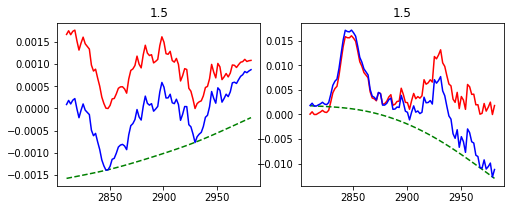

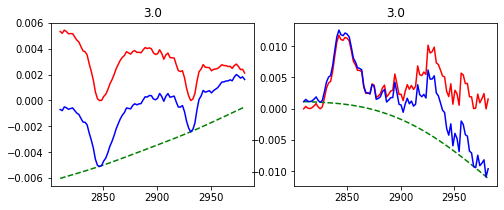

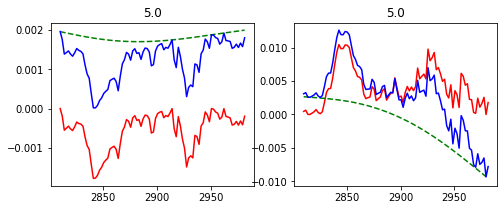

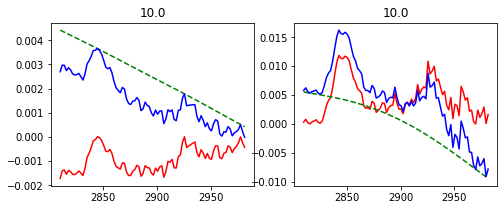

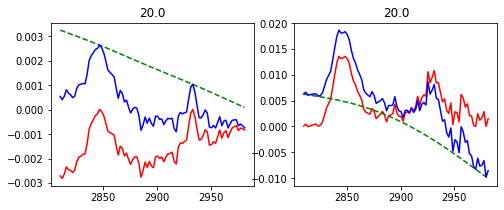

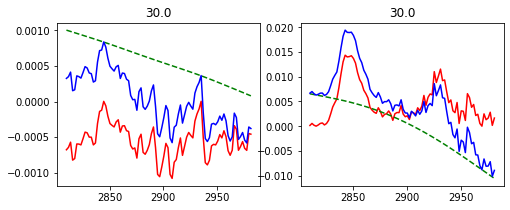

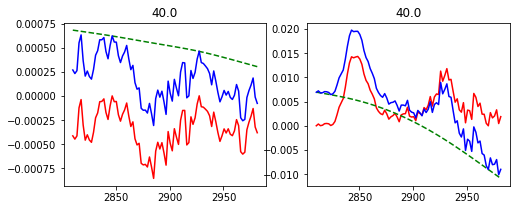

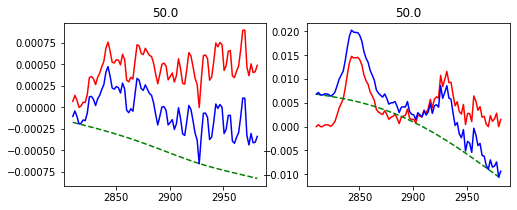

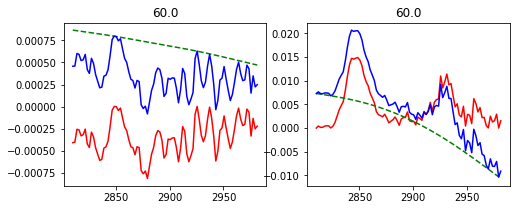

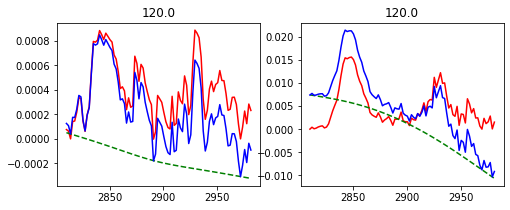

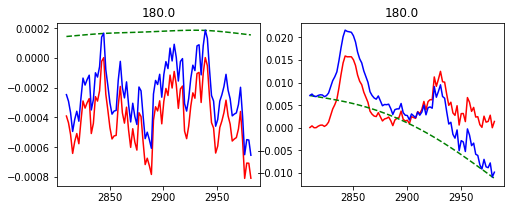

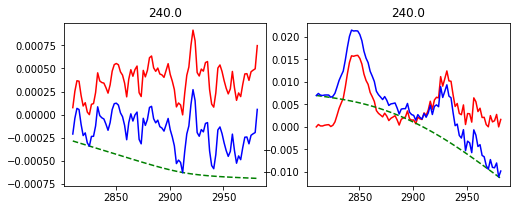

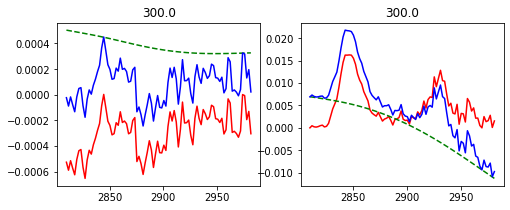

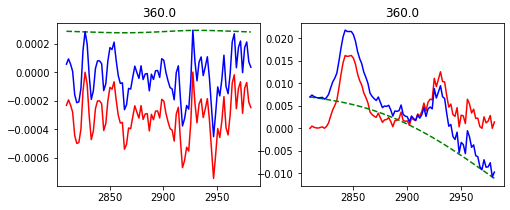

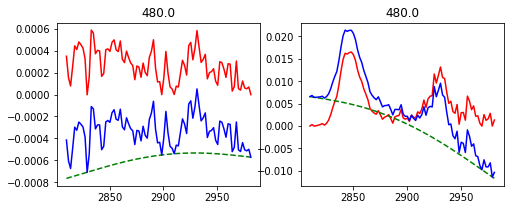

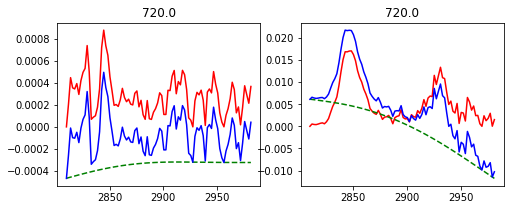

In [5]:
column_num = np.shape(dif)[1]
SCH = 1250     #start index of CH 
ECH = 1340     #end index of CH
a = np.transpose(acu[[dif.columns[0]]][SCH:ECH].to_numpy())
WN = a[0]
CH_acu = []
CH_dif = []
Time = np.zeros(column_num-1)

for i in range(1,column_num):
    Time[i-1] = get_first_nbr_from_str(dif.columns[i])
    a = np.transpose(dif[[dif.columns[i]]][SCH:ECH].to_numpy())
    a = a[0]
    ##baseline correction
    if a[38] < a[0]:
        print(get_first_nbr_from_str(dif.columns[i]))
        b = -a
        bsl = baseline_als(b, 105, 0.0001)
        y = -(b - bsl)
        bsl = -bsl
    else:
        bsl = baseline_als(a, 105, 0.0001)
        y = a - bsl

    
    a_acu = np.transpose(acu[[dif.columns[i]]][SCH:ECH].to_numpy())[0]
    bsl_acu = baseline_als(a_acu, 105, 0.0001)
    y_acu = a_acu-bsl_acu
    CH_dif.append(y)
    CH_acu.append(y_acu)
    fig,ax = plt.subplots(1,2,figsize=(8,3))
    ax[0].plot(WN,y,'r')
    ax[0].plot(WN,bsl,'g--')
    ax[0].plot(WN,a,'b')
    ax[0].set_title(Time[i-1])
    ax[1].plot(WN,y_acu,'r')
    ax[1].plot(WN,bsl_acu,'g--')
    ax[1].plot(WN,a_acu,'b')
    ax[1].set_title(Time[i-1]) 
print('The fitted region started at {0} cm-1, and ended at {1} cm-1.'.format(WN[0], WN[-1]))
x_CH = np.array(WN)
y_CH = np.array(CH_acu)
Time = np.array(Time)

In [6]:
column_num_new = np.shape(dif)[1]
S = 455
E = 675
b = np.transpose(dif[[dif.columns[0]]][S:E].to_numpy())
WN = b[0]
CC = []
CC_acu = []

for i in range(1,column_num_new):
    a = np.transpose(dif[[dif.columns[i]]][S:E].to_numpy())
    b = np.transpose(acu[[dif.columns[i]]][S:E].to_numpy())
    CC.append(a[0])
    CC_acu.append(b[0])
x_CC = np.array(WN)
y_CC = np.array(CC)
print('The fitted region started at {0} cm-1, and ended at {1} cm-1.'.format(WN[0], WN[-1]))

The fitted region started at 1276.665 cm-1, and ended at 1699.006 cm-1.


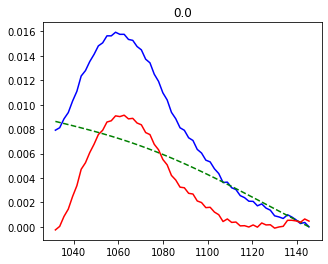

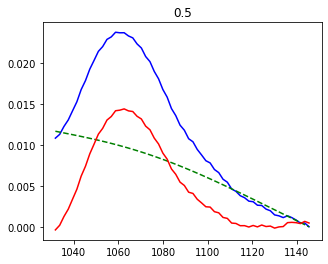

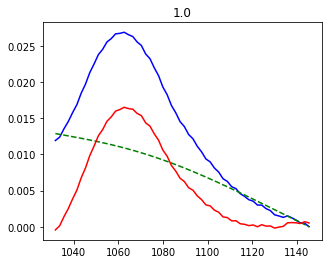

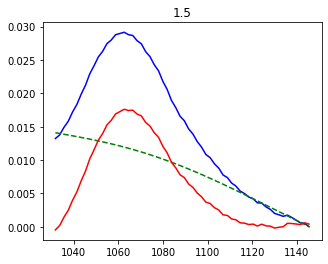

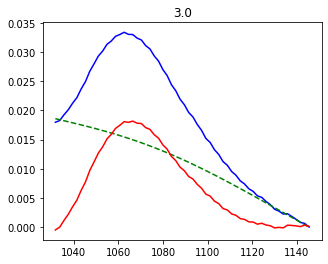

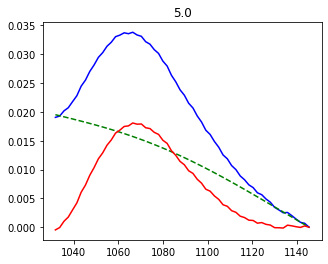

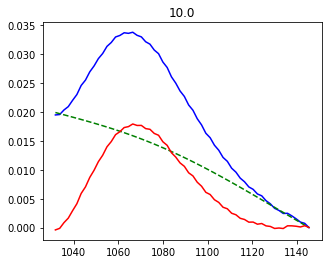

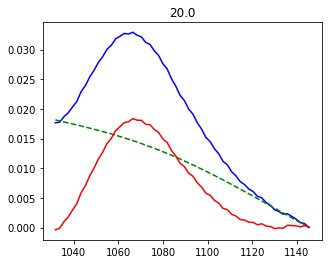

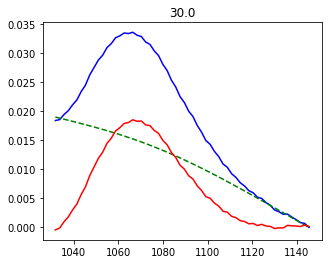

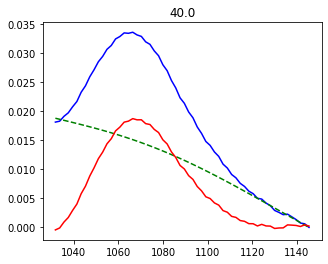

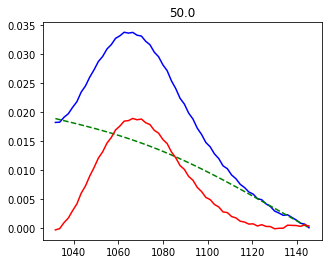

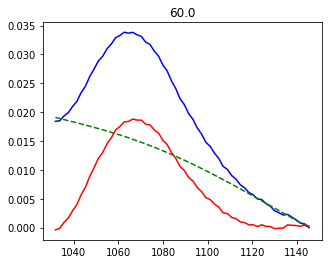

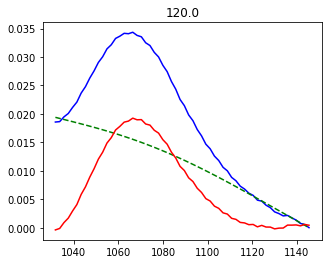

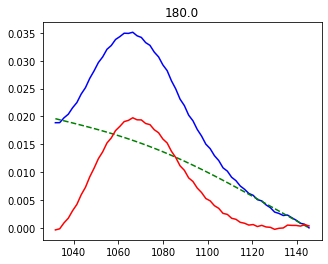

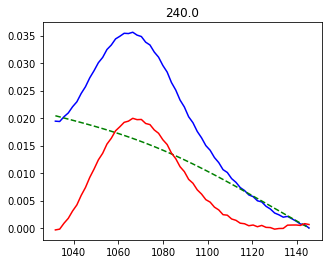

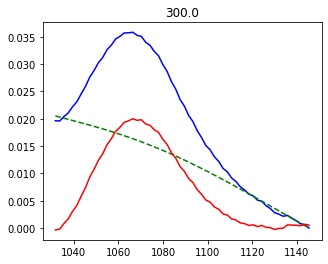

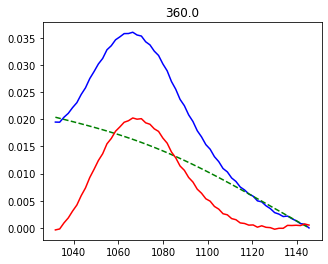

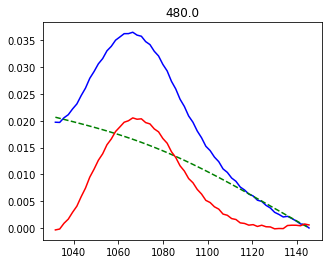

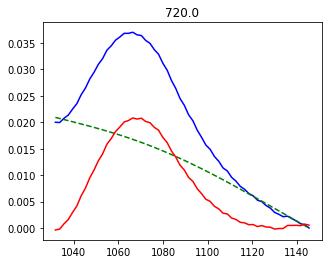

In [7]:
SCO = 328
ECO = 388
LCO = ECO-SCO
b = np.transpose(dif[[dif.columns[0]]][SCO:ECO].to_numpy())
WN = b[0]
CO = []

for i in range(1,column_num):
    a = np.transpose(acu[[dif.columns[i]]][SCO:ECO].to_numpy())
    bsl = baseline_als(a[0], 1005, 0.002)
    y = a[0] - bsl
    CO.append(y)
    fig = plt.figure(figsize=(5,4))
    plt.plot(WN,a[0]-a[0].min(),'b-')
    plt.plot(WN,bsl-bsl.min(),'g--')
    plt.plot(WN,CO[-1],'r-')
    plt.title(Time[i-1])


x_CO = np.array(WN)
y_CO = np.array(CO)

## Finding a good initial guess

By implementing the lmfit package, we can performance the optimzation of our loss function by minimizing the least square of the difference between the model and actual data. The 'leastsq' method from the lmfit package uses the 'Levenberg-Marquardt' algorithm for the minization. While often criticized, including the fact it finds
a local minima, this approach has some distinct advantages. These include being fast, and well-behaved for most
curve-fitting needs, and making it easy to estimate uncertainties for and correlations between pairs of fit variables. Still the disadvantage of the 'Levenberg-Marquardt' algorithm which is its looking for local minima should be addressed. Hence, the first step in our modeling methodology is finding a reasonable initial guess so that further optimization would have better performances. 

## Fitting the C-H vibrations

In [8]:
Vec_IG = {'Mus':np.array([2861.9,2853.1,2952,2934.2]),
          'Sigmas':np.array([6.7,3.6,4.1,2.9]),
          'Types':np.array([1,1,1,1]),
          'Lims':{'Positive':True,
                  'Mus_min':np.array([2840,2845,2900,2900]),
                  'Mus_max':None}}

In [9]:
t0 = time.time()
fit_params_IG = Generate_params_IG(x_CH,Vec_IG,ndata = 19)

fitter = Minimizer(loss_func_IG, fit_params_IG, fcn_args=(x_CH, y_CH, Vec_IG))
result = fitter.minimize(method='leastsq')
t1 = time.time() 

print('The time cost is:',t1-t0)

The time cost is: 43.69453310966492


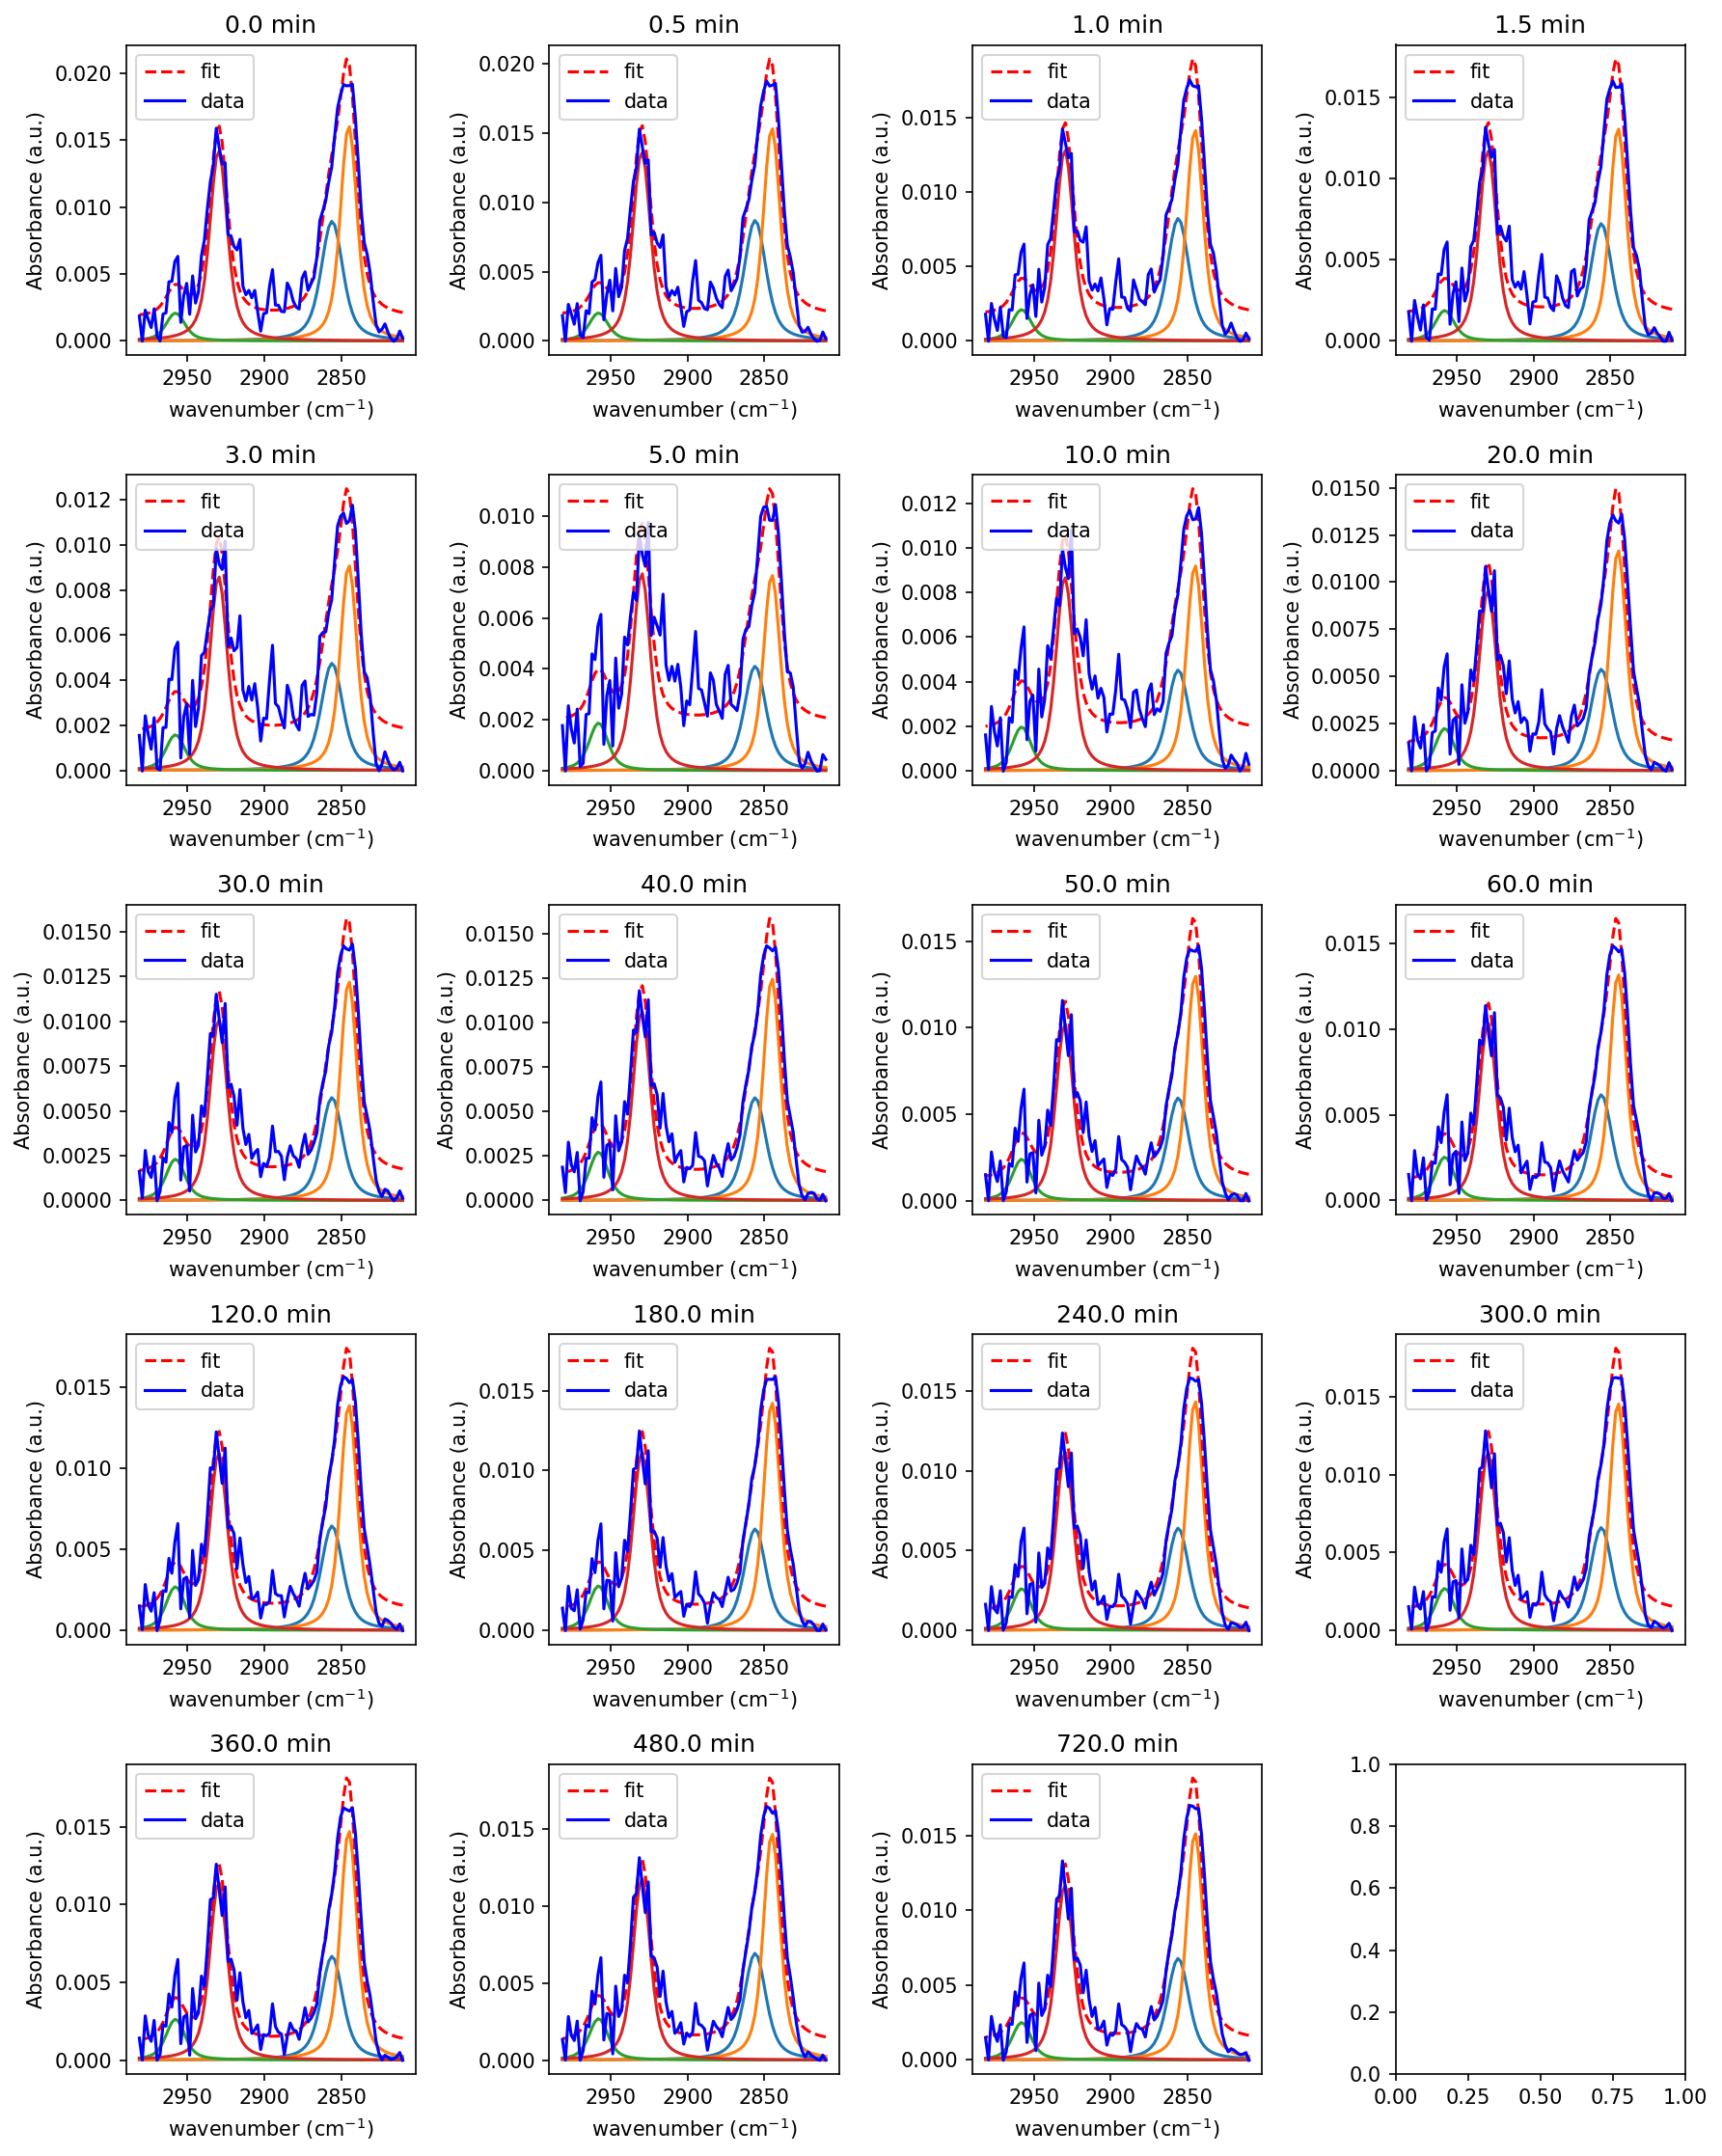

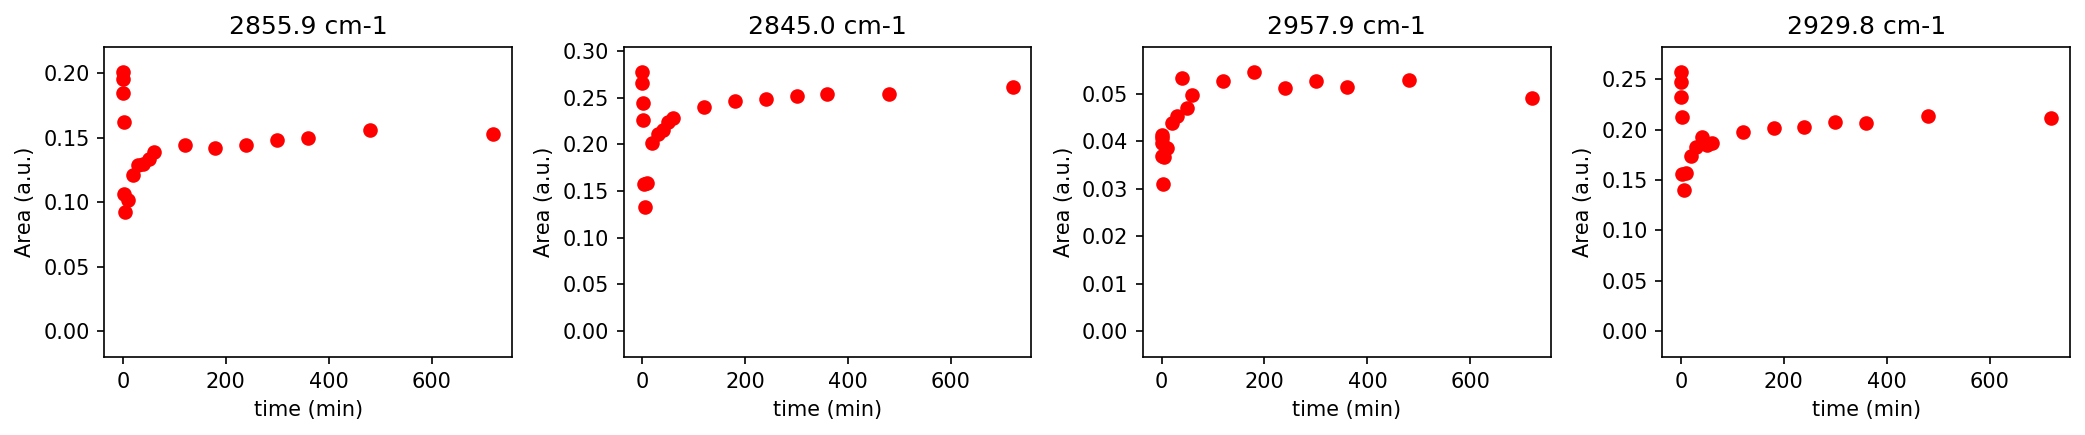

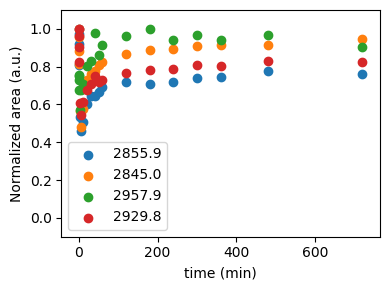

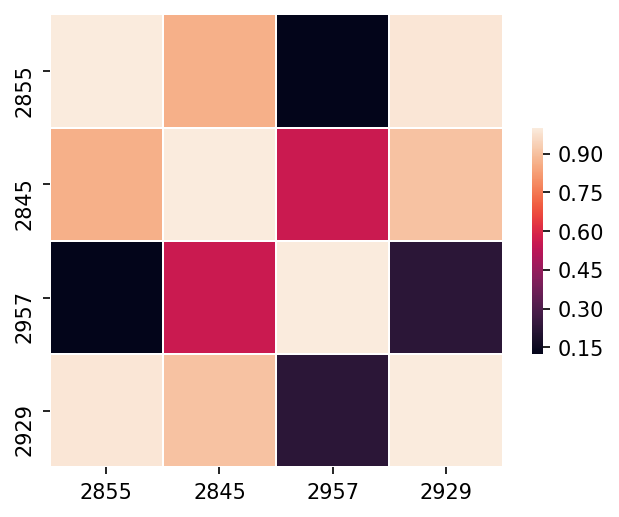

{'Peak Pos': [2855, 2845, 2957, 2929],
 'Amps': array([[0.20073341, 0.27706568, 0.04079188, 0.25672569],
        [0.19567011, 0.26544268, 0.03965523, 0.24684495],
        [0.18495763, 0.24476765, 0.04134558, 0.23196185],
        [0.16254961, 0.22597629, 0.03688816, 0.21209141],
        [0.10679025, 0.15713791, 0.03100297, 0.15545001],
        [0.09217662, 0.13274658, 0.03676476, 0.14013754],
        [0.10155281, 0.15916105, 0.03853475, 0.15709625],
        [0.12090189, 0.20183091, 0.04394127, 0.17333529],
        [0.12891434, 0.21090828, 0.04524333, 0.18238795],
        [0.12984641, 0.21549153, 0.05343719, 0.19223754],
        [0.13324765, 0.2244276 , 0.0469835 , 0.18437455],
        [0.13881141, 0.2281139 , 0.04982075, 0.18699554],
        [0.14438429, 0.23968389, 0.05259828, 0.19731064],
        [0.14243748, 0.24599608, 0.05451665, 0.20117858],
        [0.1440383 , 0.24823311, 0.05119941, 0.20209181],
        [0.14849414, 0.25211631, 0.05278157, 0.20713125],
        [0.1497886 , 0.25

In [10]:
params_IG = result.params
Plot_data_IG(params_IG,x_CH,y_CH,Vec_IG,Time,False)

In [11]:

Vec_IG_struc = {'Peaks':[[0,1,2,3]], #Index of peaks that are from the same species
                'Types':[[1,1,1,1]]} #Peak type of each peak in this vector

Vec_fit = Generate_Vec_IG(params_IG,Vec_IG_struc,18)
Vec_fit['Alphas'] = None
Vec_fit['Vec0']['Mus'] = np.array([2847.1,2860.9,2940.8,2951.8])
Vec_fit['Vec0']['Lims'] = {'Peaks':np.array([0,1,2,3]),
                           'Specs':np.array([[2840,2850,2900,2945],
                                            [2875,2875,4000,4000],
                                            [1.5,1.5,1.5,0.6],
                                            [6.5,6.5,6.5,6.5],
                                            [0.00001,0.00001,0.0001,0.001]]),
                           'Pos': None}

In [12]:
t0 = time.time()
fit_params = Generate_params(x_CH,Vec_fit,ndata = 19)

fitter = Minimizer(loss_func, fit_params, fcn_args=(x_CH, y_CH, Vec_fit))
result = fitter.minimize(method='leastsq')
t1 = time.time()

print('The time cost is:',t1-t0)

0 4.690007702833842 1.5 6.5
0 2847.1 2840.0 2875.0
0 3.6 1.5 6.5
0 2860.9 2850.0 2875.0
0 4.1 1.5 6.5
0 2940.8 2910.8 2970.8
0 3.7699999632453935 0.6 6.5
0 2951.8 2945.0 2981.8
The time cost is: 103.82909178733826


In [13]:
new_params = result.params
yhat_CH = Generate_data(new_params,x_CH,Vec_fit,ndata=19)
print('The R2 score of the fit is: {:.2f}'.format(r2_score(y_CH.flatten(), yhat_CH.flatten())))

The R2 score of the fit is: 0.94


Plotting.....


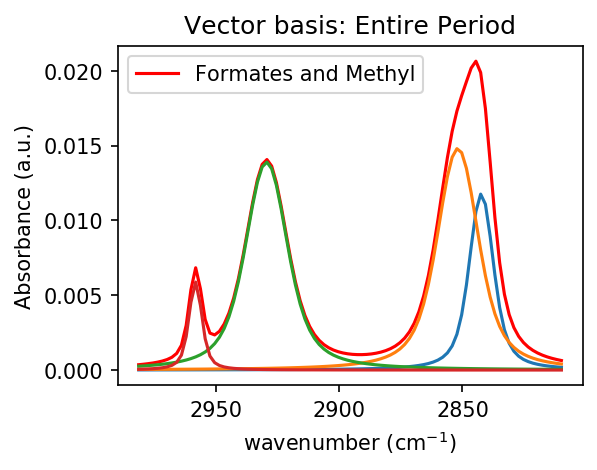

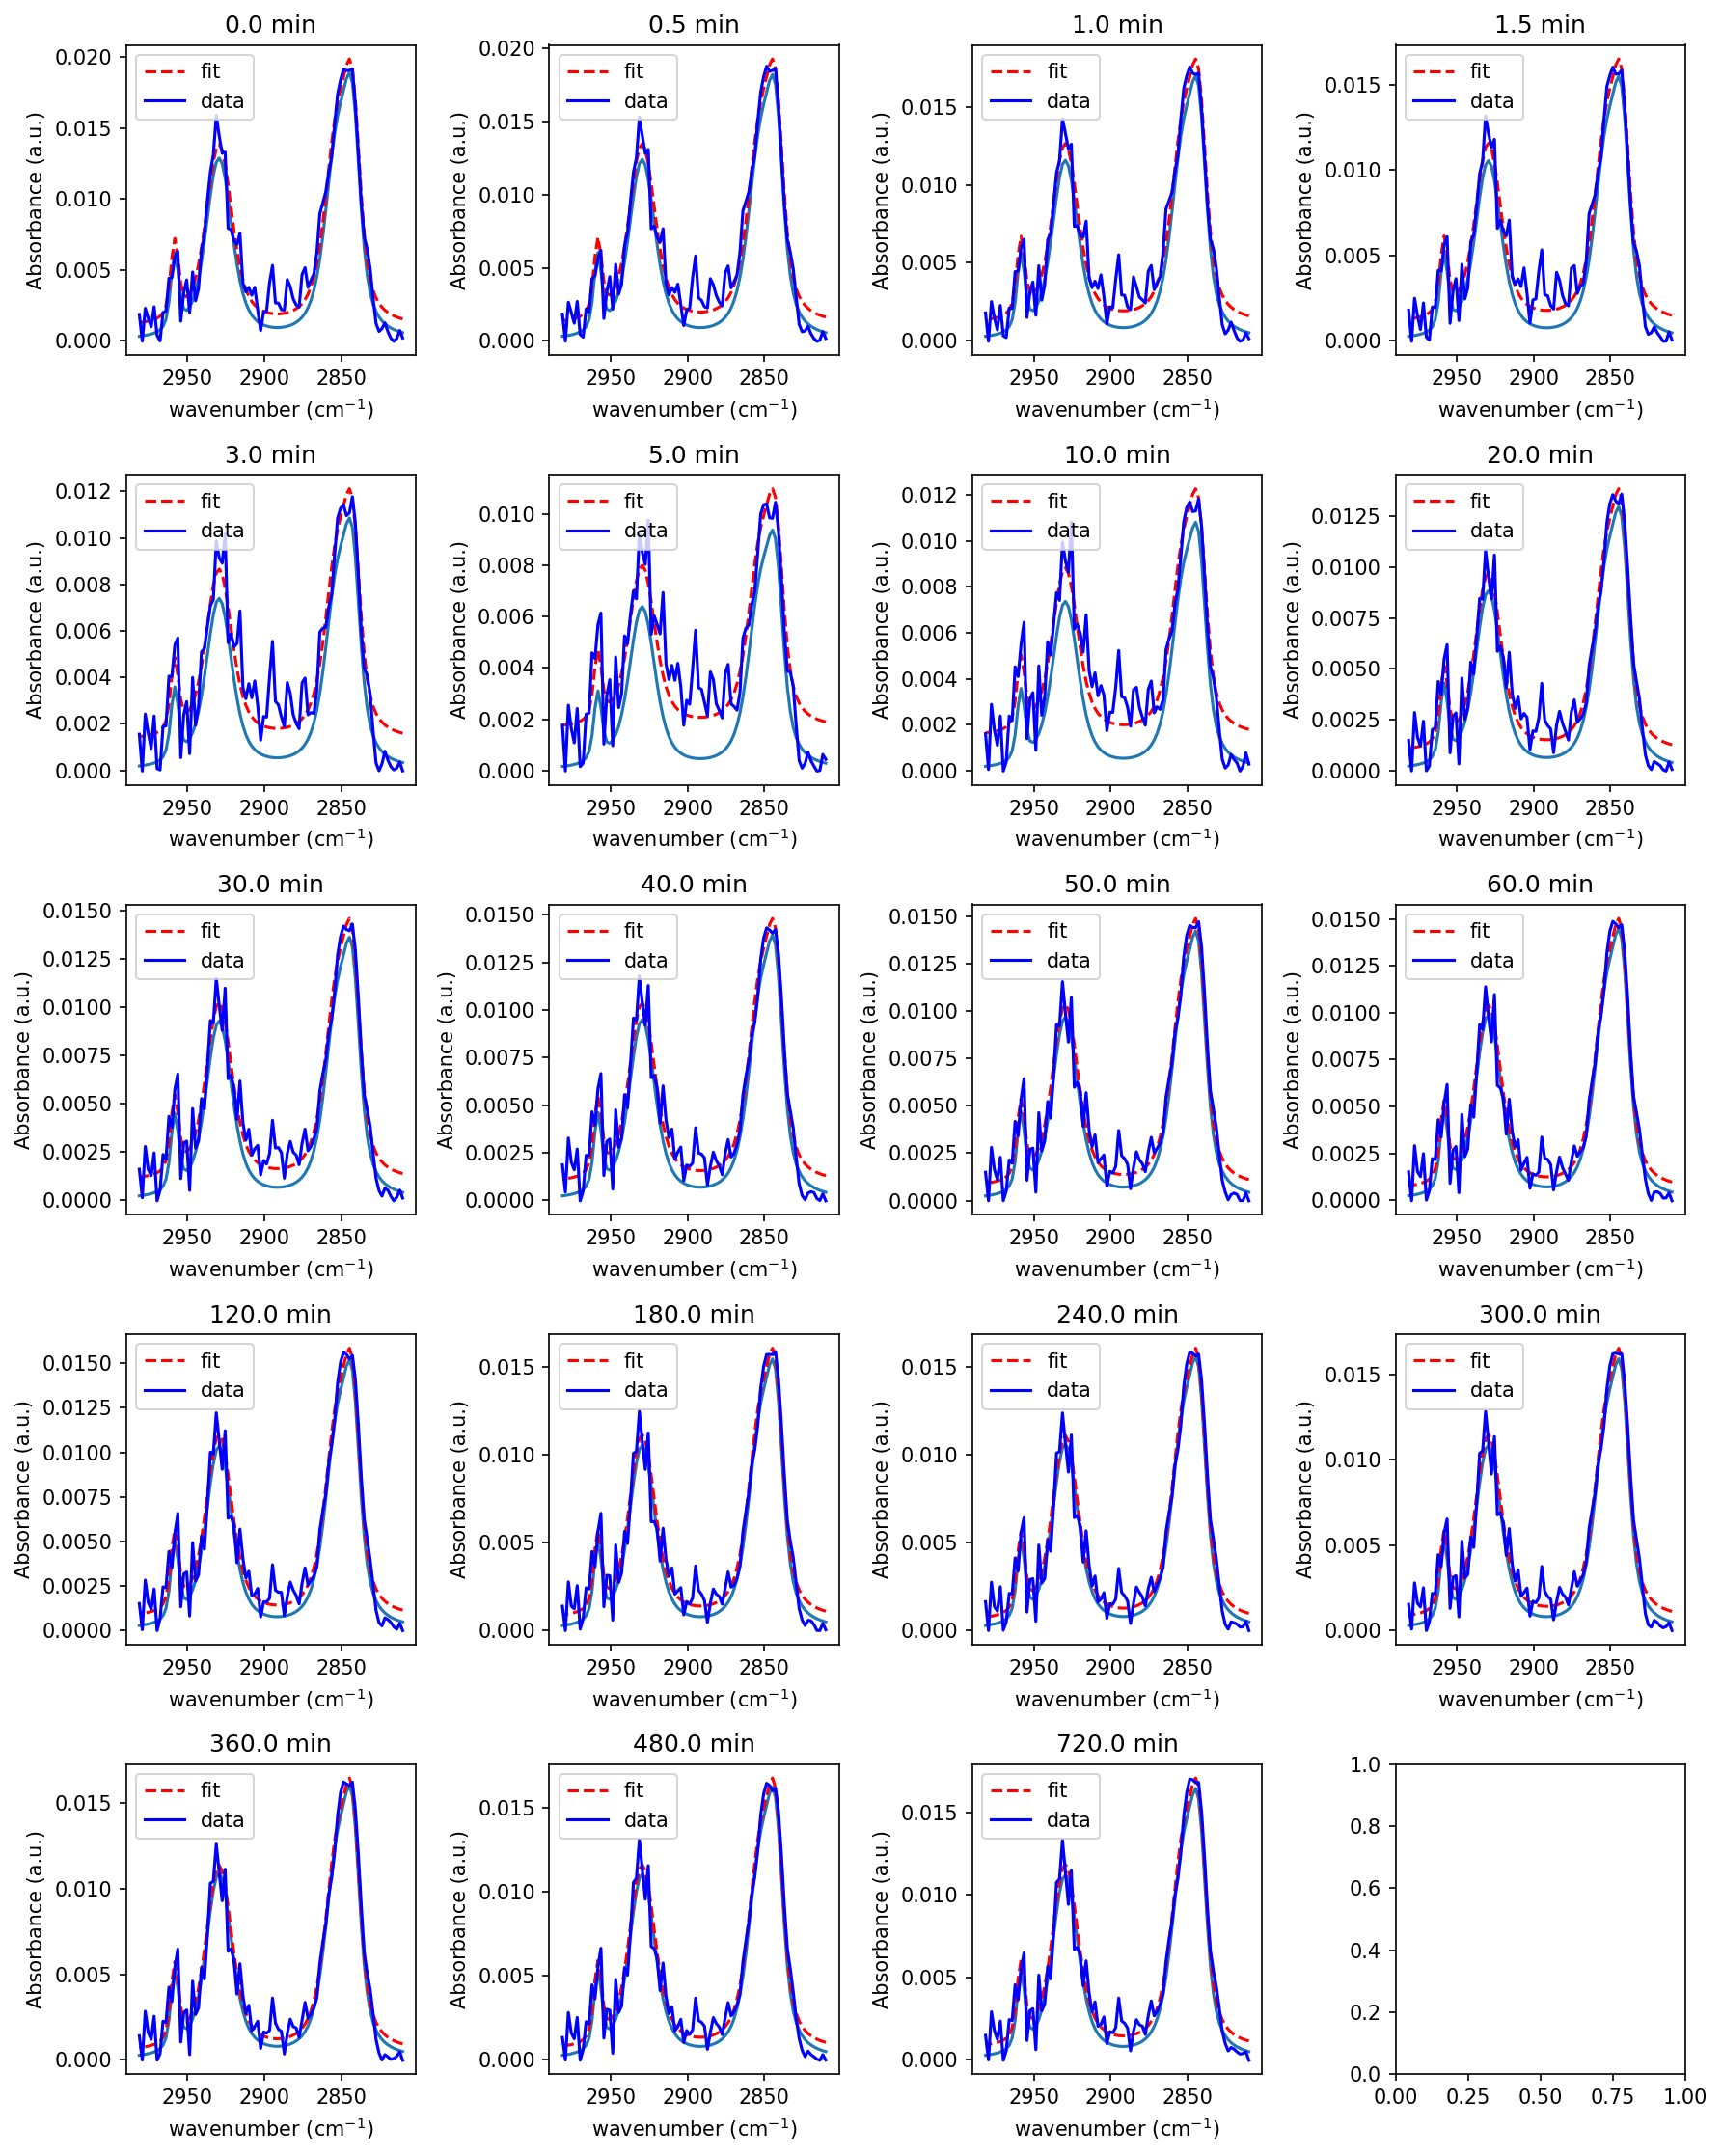

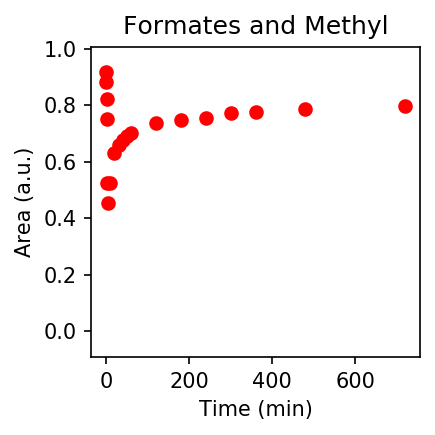

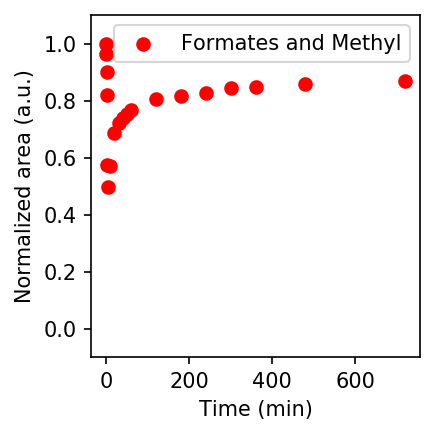

In [14]:
Vec_name=np.array(['Formates and Methyl'])
data_CH = Plot_data(new_params,x_CH,y_CH,Vec_fit,Time,Vec_name,False)

## Fitting the 1300-1700 cm$^{-1}$ region

We want to include a peak around 1600 cm$^{-1}$ as the C=O species, two peaks around 1540 cm$^{-1}$ for carbonates, 4 peaks around 1300 cm$^{-1}$ to 1500 cm$^{-1}$ for aromatics and finally, a two peaks around 1350 cm$^{-1}$ for the formates.

We wanna repeat the previous procedure, i.e.:

    1) Make an initial guess on all the peaks
    2) Group the peaks and creat a vector space
    3) Use the new vector basis to perform non-linear regression fit for optimization of the parameters
   


### Fitting the initial stage (0,10) min

We use postfix _CC0 for fitting of this period.

Below is an intial guess of the peaks.

In [15]:
Vec_IG_CC0 = {'Mus':np.array([1600.5,1544.5,1548.3,1488.25,1424.5, 1349.9,1371.1,1357.8,1304]),
             'Sigmas':np.array([10,3.624,17.8,13.4,17.9, 22.9,1.764,4.375,2]),
             'Types':np.array([1,0,1,1,1,1,0,0,0]),
             'Lims':{'Positive':None,
                     'Mus_min':np.array([1590,1537., 1500., 1460, 1370,1330, 1330, 1330, 1300.]),
                     'Mus_max':np.array([1620,1590., 1590., 1540, 1450,1390, 1380, 1380, 1310.])}             
             }


In [16]:
t0 = time.time()
ndata = 4
fit_params_IG = Generate_params_IG(x_CC,Vec_IG_CC0,ndata = ndata)
fitter = Minimizer(loss_func_IG, fit_params_IG, fcn_args=(x_CC, y_CC[:ndata], Vec_IG_CC0))
result = fitter.minimize(method='leastsq')
t1 = time.time() 

print('The time cost is:',t1-t0)

The time cost is: 149.22462797164917


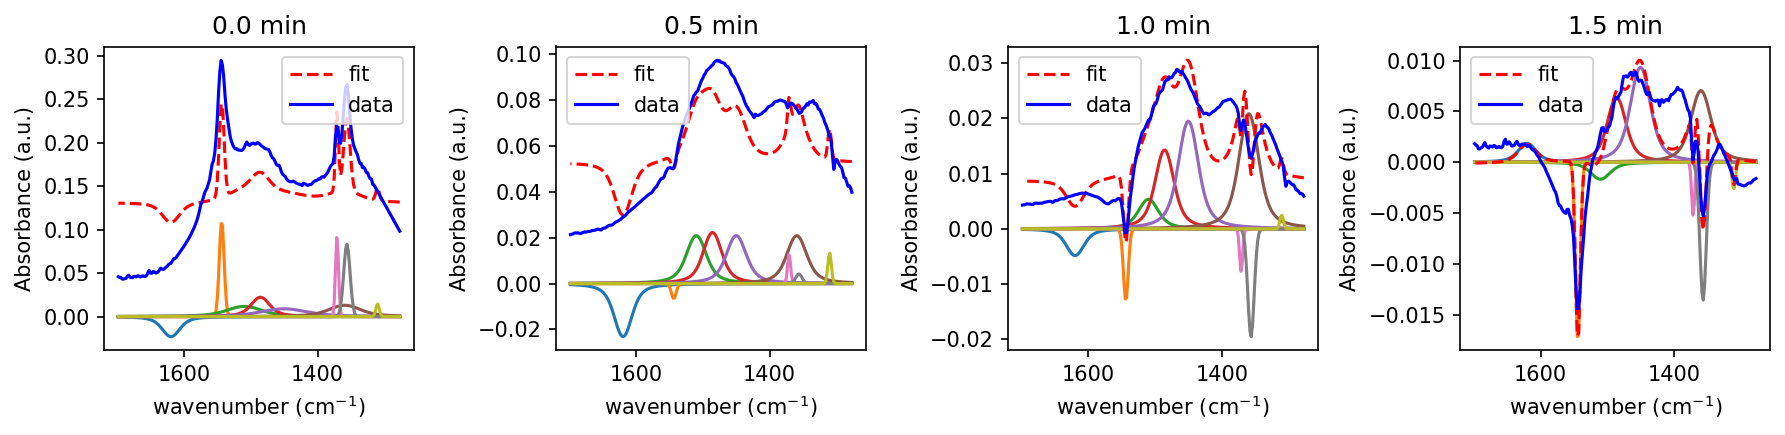

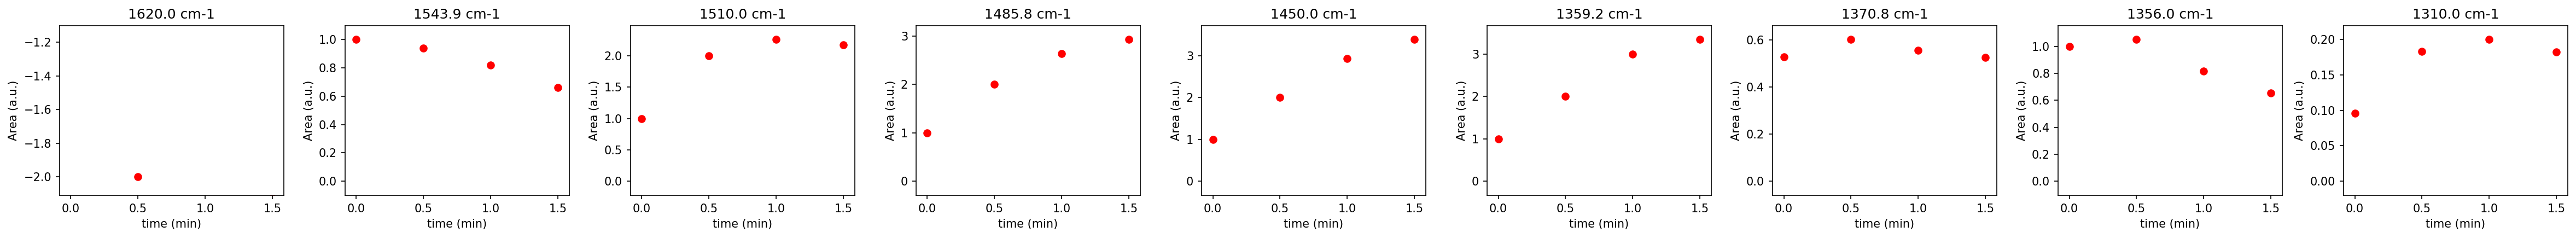

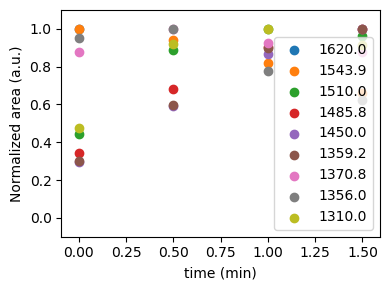

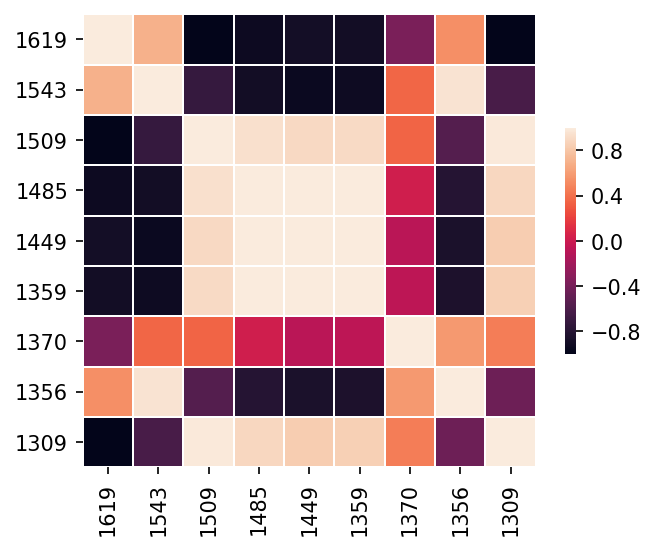

{'Peak Pos': [1619, 1543, 1509, 1485, 1449, 1359, 1370, 1356, 1309],
 'Amps': array([[-1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
          1.        ,  0.52903738,  1.        ,  0.09546399],
        [-2.        ,  0.9401492 ,  2.        ,  2.        ,  2.        ,
          2.        ,  0.60239819,  1.05015732,  0.18321693],
        [-2.20959345,  0.8214571 ,  2.25648809,  2.64253142,  2.93523564,
          3.        ,  0.55761132,  0.81547881,  0.19968579],
        [-2.12992387,  0.6611687 ,  2.1762337 ,  2.92868235,  3.38260626,
          3.33770217,  0.52730676,  0.65255876,  0.18236807]])}

In [17]:
params_IG = result.params
Plot_data_IG(params_IG,x_CC,y_CC[:ndata],Vec_IG_CC0,Time[:ndata],True)

Now we want to creat a frame of the vector space, i.e. we need to define how many vectors are there and which peaks belong to which vector.

In [18]:
Vec_IG_struc_CC = {'Peaks':np.array([[0],[1,2],[3,4,5],[6,7],[8]]),
                   'Types':np.array([[1],[0,1],[1,1,1],[0,0],[0]])}
Vec_fit_CC0 = Generate_Vec_IG(params_IG,Vec_IG_struc_CC,ndata)

#Vec_fit['Vec0']['Lims'] = {'Peaks':np.array([0,1,2,3]),
#                           'Specs':np.array([[0.1,0.1,0.1,0.1],
#                                            [4000,4000,4000,4000],
#                                            [0.1,.1,0.1,0.1],
#                                            [6.5,6.5,6.5,6.5]])}



In [19]:
t0 = time.time()
#Vec_fit_CC0['Alphas'] = None
Vec_fit_CC0['Vec0']['Lims'] = {'Peaks':np.array([0]),
                               'Specs':np.array([[1580],[1615],[10],[25],[0]]),
                               'Pos':[True]}
Vec_fit_CC0['Vec1']['Mus'][1] = 1575.
Vec_fit_CC0['Vec1']['Lims'] = {'Peaks':np.array([0,1]),
                               'Specs':np.array([[1530,1530],
                                                 [1580,1580],
                                                 [4.1,5],
                                                 [10,23],
                                                 [0,0]]),
                               'Pos':None}
Vec_fit_CC0['Vec2']['Mus'][0] = 1565.
Vec_fit_CC0['Vec2']['Sigmas'][0] = 20.
Vec_fit_CC0['Vec2']['Mus'][1] = 1480.
Vec_fit_CC0['Vec2']['Sigmas'][0] = 20.
Vec_fit_CC0['Vec2']['Mus'][2] = 1354.
Vec_fit_CC0['Vec2']['Lims'] = {'Peaks':np.array([0,1,2]),
                               'Specs':np.array([[1500,1460,1300],
                                                 [1580,14520,1400],
                                                 [10.,10.,10.],
                                                 [35,35,35],
                                                 [0,0,0]]),
                               'Pos':None}
Vec_fit_CC0['Vec3']['Mus'] = np.array([1361,1370])
Vec_fit_CC0['Vec3']['Lims'] = {'Peaks':np.array([0,1]),
                               'Specs':np.array([[1340,1360],[1362,1380],[1.5,1.5],[3.5,3.5],[-0.31,-0.31]]),
                               'Pos':None}

Vec_fit_CC0['Vec4']['Lims'] = {'Peaks':np.array([0]),
                               'Specs':np.array([[0],[1615],[0.1],[4.5],[-10]]),
                               'Pos':None}
fit_params_CC0 = Generate_params(x_CC,Vec_fit_CC0,ndata =ndata)
fitter = Minimizer(loss_func, fit_params_CC0, fcn_args=(x_CC, y_CC[:ndata], Vec_fit_CC0))
result = fitter.minimize(method='leastsq')
t1 = time.time() 

print('The time cost is:',t1-t0)


0 9.026378143504738 10 24.026378143504736
0 1619.9999999999998 1589.9999999999998 1615
1 3.624 4.1 6.5
1 1543.8740465694646 1538.8740465694646 1548.8740465694646
1 17.8 5.0 23.0
1 1575.0 1545.0 1580.0
2 20.0 10.0 25.0
2 1565.0 1535.0 1580.0
2 23.269999999954173 10.0 25.0
2 1480.0 1460.0 1510.0
2 16.030000281676028 10.0 25.0
2 1354.0 1324.0 1384.0
3 2.2931999999999992 1.5 3.5
3 1361 1356.0 1362.0
3 4.783447142909447 1.5 3.5
3 1370 1365.0 1375.0
4 2.5999999999999996 0.1 4.5
4 1309.956896561295 1304.956896561295 1314.956896561295
The time cost is: 1.943695068359375


In [20]:
new_params_CC0 = result.params

The R2 score of the fit is: 0.97
Plotting.....


Aldehydes  Carbonates  Aromatics  Formates   Gas CH4
0   0.334469    3.435194  26.668507  1.381968  0.202508
1   0.334499    2.386561  43.395164  1.167121  0.288011
2   0.334499    1.687860  48.429031  1.021357  0.273517
3   0.334966    1.124609  49.455902  0.889709  0.233649

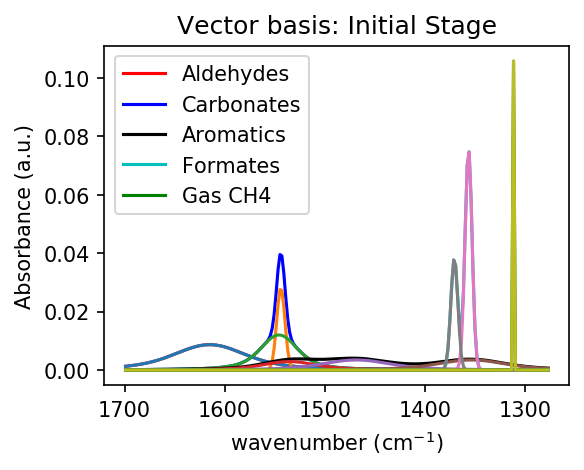

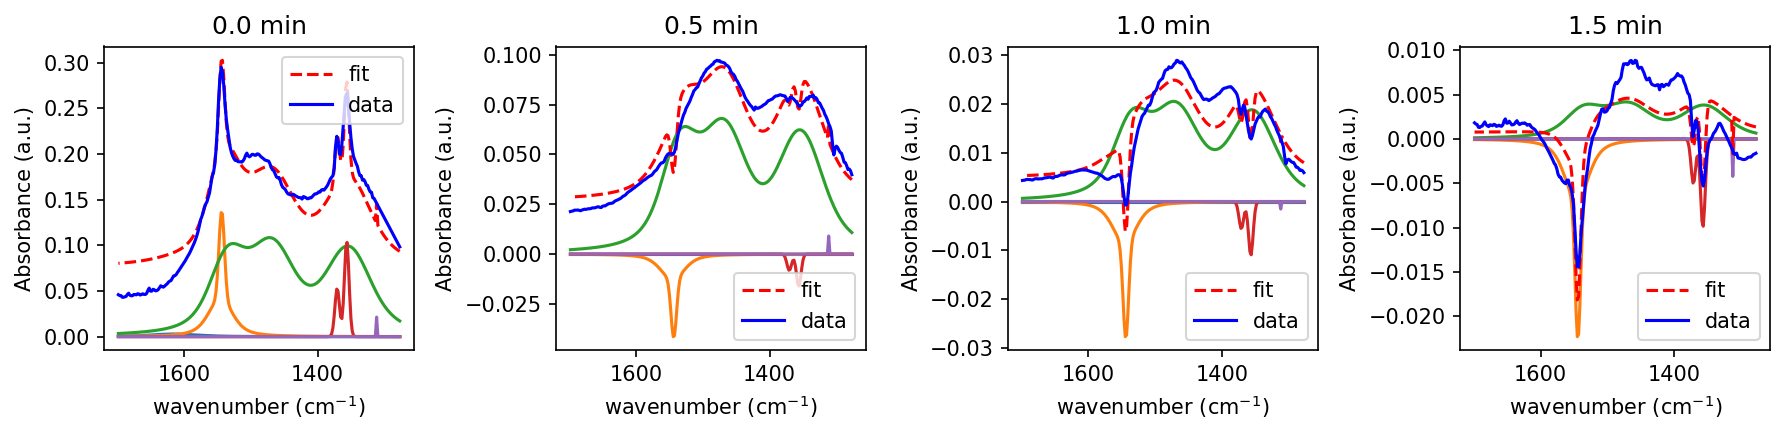

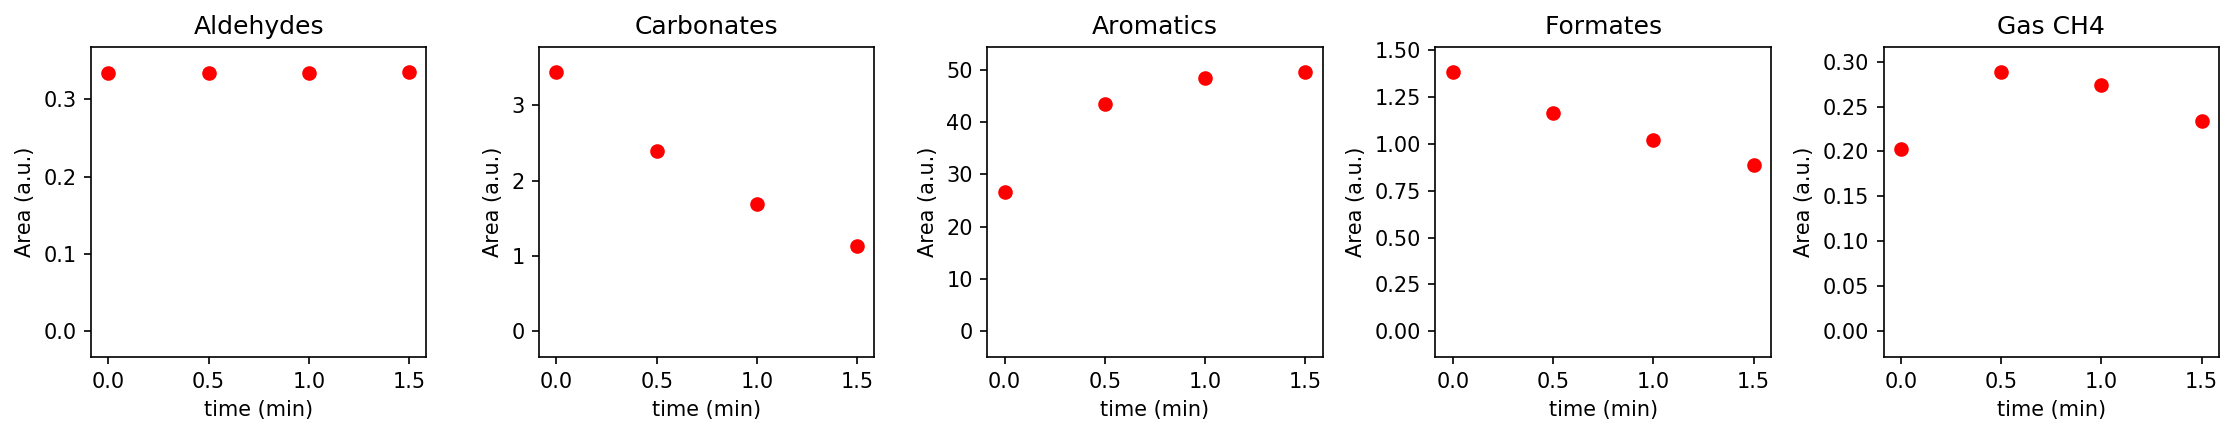

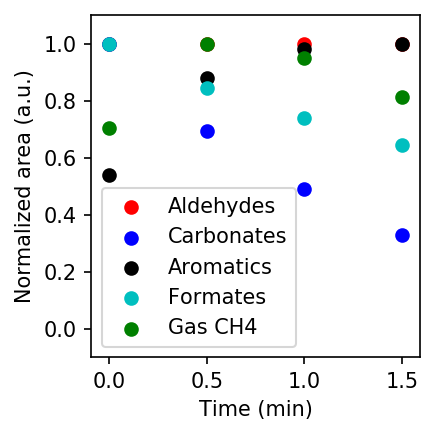

In [21]:
Vec_name_CC0 = np.array(['Aldehydes','Carbonates','Aromatics','Formates','Gas CH4'])
yhat_CC0 = Generate_data(new_params_CC0,x_CC,Vec_fit_CC0,ndata=ndata)
print('The R2 score of the fit is: {:.2f}'.format(r2_score(y_CC[:ndata].flatten(), yhat_CC0.flatten())))

Plot_data(new_params_CC0,x_CC,y_CC[:ndata],Vec_fit_CC0,Time[:ndata],Vec_name_CC0,True)

### Fitting the Middle Stage (20,120) min

We use postfix _CC1 for fitting of this period.

Below is an intial guess of the peaks.

In [22]:
Vec_CC_IG1 = {'Mus':np.array([1601.5,1544.5,1548.3,1488.25,1424.5, 1349.9,1371.1,1357.8,1304]),
             'Sigmas':np.array([10,3.624,17.8,13.4,17.9, 22.9,1.764,4.375,2]),
             'Types':np.array([1,0,1,1,1,1,0,0,0]),
             'Fixed':None,#np.array([0,0,0,0,0,0,0,1,1,1]),
             'Lims':{'Positive':False,
                     'Mus_min':np.array([1595,1537., 1500., 1460, 1370,1330, 1300, 1330, 1300.]),
                    'Mus_max':None}
             }


In [23]:
t0 = time.time()
nstart = 4
ndata = 4

fit_params_IG1 = Generate_params_IG(x_CC,Vec_CC_IG1,ndata = ndata)

fitter = Minimizer(loss_func_IG, fit_params_IG1, fcn_args=(x_CC, y_CC[nstart:nstart+ndata], Vec_CC_IG1))
result = fitter.minimize(method='leastsq')
t1 = time.time() 

print('The time cost is:',t1-t0)

The time cost is: 179.49439215660095


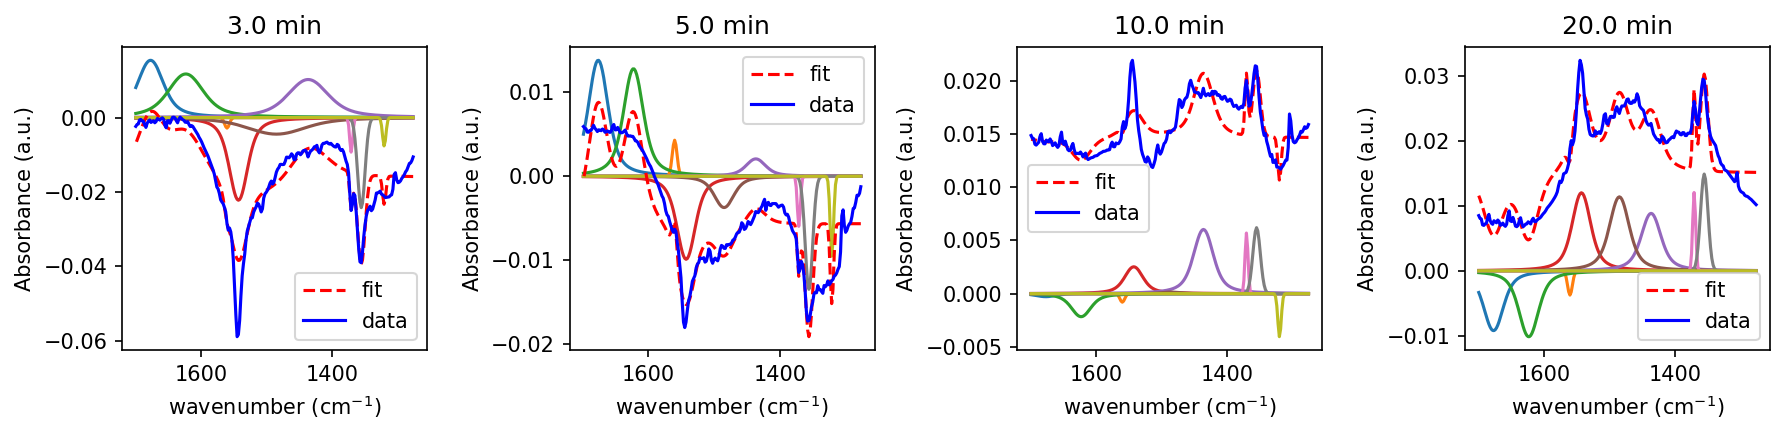

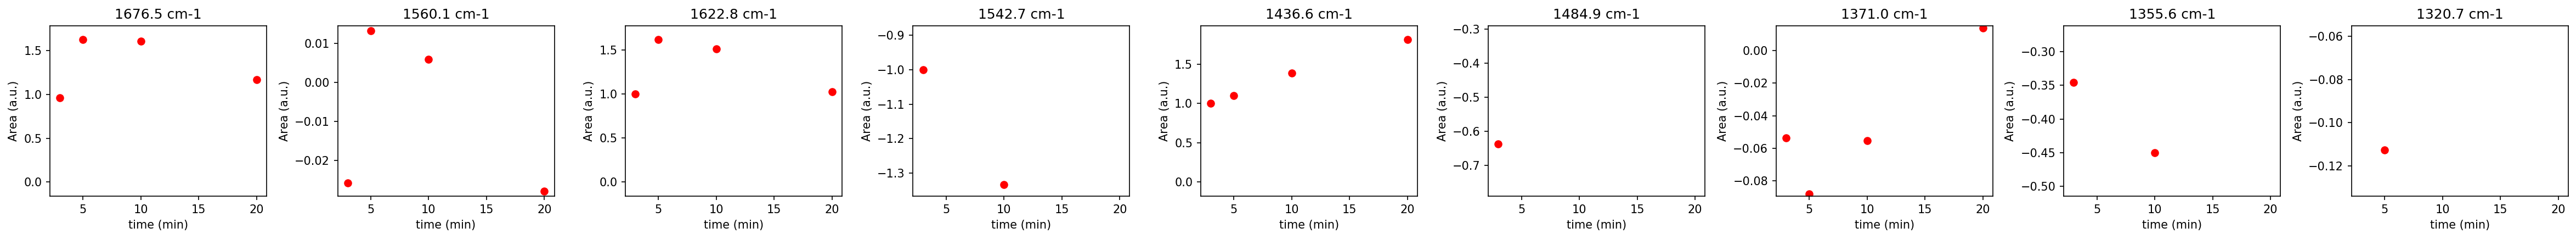

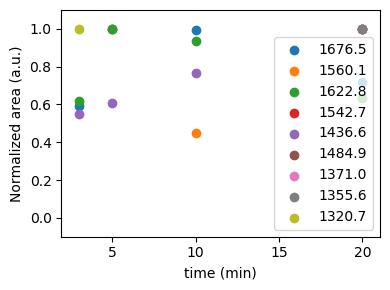

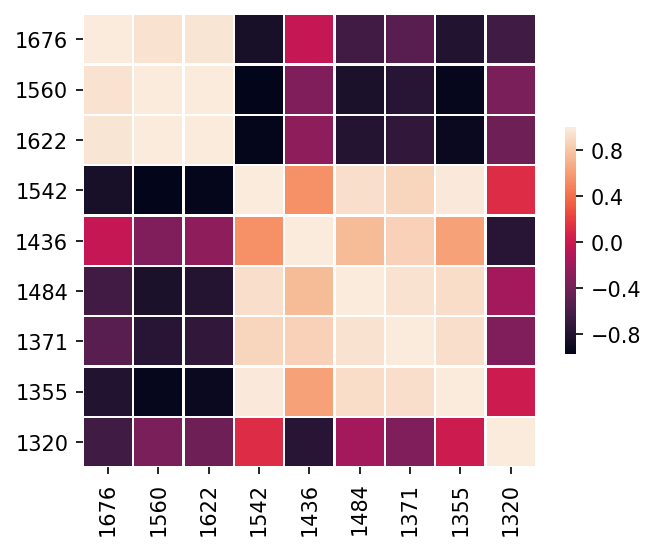

{'Peak Pos': [1676, 1560, 1622, 1542, 1436, 1484, 1371, 1355, 1320],
 'Amps': array([[ 0.95986166, -0.02580056,  1.        , -1.        ,  1.        ,
         -0.63682339, -0.05361253, -0.34569239, -0.05002075],
        [ 1.62370934,  0.01326719,  1.61526366, -1.44601773,  1.09914369,
         -0.81619832, -0.08810216, -0.53827114, -0.11259912],
        [ 1.60997761,  0.00595857,  1.51156601, -1.33276056,  1.38781933,
         -0.8090418 , -0.05533351, -0.44998609, -0.13907198],
        [ 1.16888607, -0.02790615,  1.02529358, -0.79301017,  1.81163369,
         -0.26360431,  0.01408087, -0.23770342, -0.13900322]])}

In [24]:
params_IG1 = result.params
Plot_data_IG(params_IG1,x_CC,y_CC[nstart:nstart+ndata],Vec_CC_IG1,Time[nstart:nstart+ndata],True)

In [74]:

Vec_fit_CC1 = Generate_Vec_IG(params_IG1,Vec_IG_struc_CC,ndata)

In [78]:
t0 = time.time()


Vec_fit_CC1['Vec0']['Mus'][0]=1605.
Vec_fit_CC1['Vec0']['Lims'] = {'Peaks':np.array([0]),
                               'Specs':np.array([[1595],[1620],[0.1],[20],[0]]),
                               'Pos':[True]}
Vec_fit_CC1['Vec1']['Mus'][0]=1547.
Vec_fit_CC1['Vec1']['Sigmas'][0] = 2.7
Vec_fit_CC1['Vec1']['Mus'][1]=1540.
Vec_fit_CC1['Vec1']['Sigmas'][1] = 15.7
Vec_fit_CC1['Vec1']['Amps'][0] = -0.05
Vec_fit_CC1['Vec1']['Amps'][1] = -0.02
Vec_fit_CC1['Vec1']['Lims'] = {'Peaks':np.array([0,1]),
                               'Specs':np.array([[1520,1550],[1570,1580],[2.2,1.2],[3.4,25.],[-10,-1]]),
                               'Pos':None}
Vec_fit_CC1['Vec2']['Mus'][0] = 1490.
Vec_fit_CC1['Vec2']['Sigmas'][0] = 12.
Vec_fit_CC1['Vec2']['Amps'][0] = -0.05
Vec_fit_CC1['Vec2']['Mus'][1] = 1403.
Vec_fit_CC1['Vec2']['Mus'][2] = 1340.

Vec_fit_CC1['Vec2']['Lims'] = {'Peaks':np.array([0,1,2]),
                               'Specs':np.array([[1470,1370,1300],
                                                 [1550,1415,1390],
                                                 [8,10,10.],
                                                 [22,22,22],
                                                 [-1,-1,-1]]),
                                'Pos':None}
Vec_fit_CC1['Vec3']['Mus'] = np.array([1361,1370])
Vec_fit_CC1['Vec3']['Lims'] = {'Peaks':np.array([0,1]),
                               'Specs':np.array([[1340,1360],[1362,1380],[1.5,1.5],[3.0,3.5],[-1,-1]]),
                               'Pos':None}

Vec_fit_CC1['Vec4']['Mus'] = np.array([1305])
Vec_fit_CC1['Vec4']['Lims'] = {'Peaks':np.array([0]),
                               'Specs':np.array([[1300],[1310],[1.1],[4.5],[-1]]),
                               'Pos':None}
fit_params_CC1 = Generate_params(x_CC,Vec_fit_CC1,ndata =ndata)

fitter = Minimizer(loss_func, fit_params_CC1, fcn_args=(x_CC, y_CC[nstart:nstart+ndata], Vec_fit_CC1))
result = fitter.minimize(method='leastsq')
t1 = time.time() 

print('The time cost is:',t1-t0)

0 12.999999999989969 0.1 20.0
0 1605.0 1595.0 1620.0
1 2.7 2.2 3.4
1 1547.0 1542.0 1552.0
1 15.7 1.2 25.0
1 1540.0 1550.0 1570.0
2 12.0 8.0 22.0
2 1490.0 1470.0 1520.0
2 20.393647432644563 10.0 22.0
2 1403.0 1373.0 1415.0
2 29.769999999886572 14.769999999886572 22.0
2 1340.0 1310.0 1370.0
3 2.2931999999999992 1.5 3.0
3 1361 1356.0 1362.0
3 5.687499999999998 1.5 3.5
3 1370 1365.0 1375.0
4 2.5999999999998042 1.1 4.5
4 1305 1300.0 1310.0
The time cost is: 162.22890305519104


In [84]:
new_params_CC1 = result.params

The R2 score of the fit is: 0.92
Plotting.....


Aldehydes  Carbonates  Aromatics  Formates   Gas CH4
0   1.450745   -1.298161  -0.011319 -0.327844 -0.093996
1   2.693569   -1.767685  -0.167701 -0.482456 -0.155296
2   2.693569   -1.576411   0.610499 -0.427932 -0.177920
3   2.693569   -0.929484   2.427241 -0.298635 -0.190906

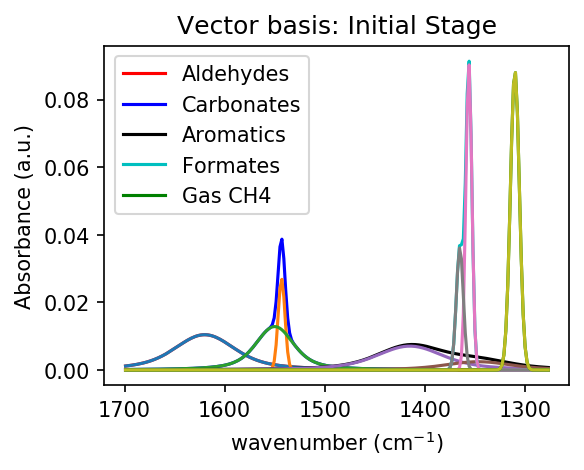

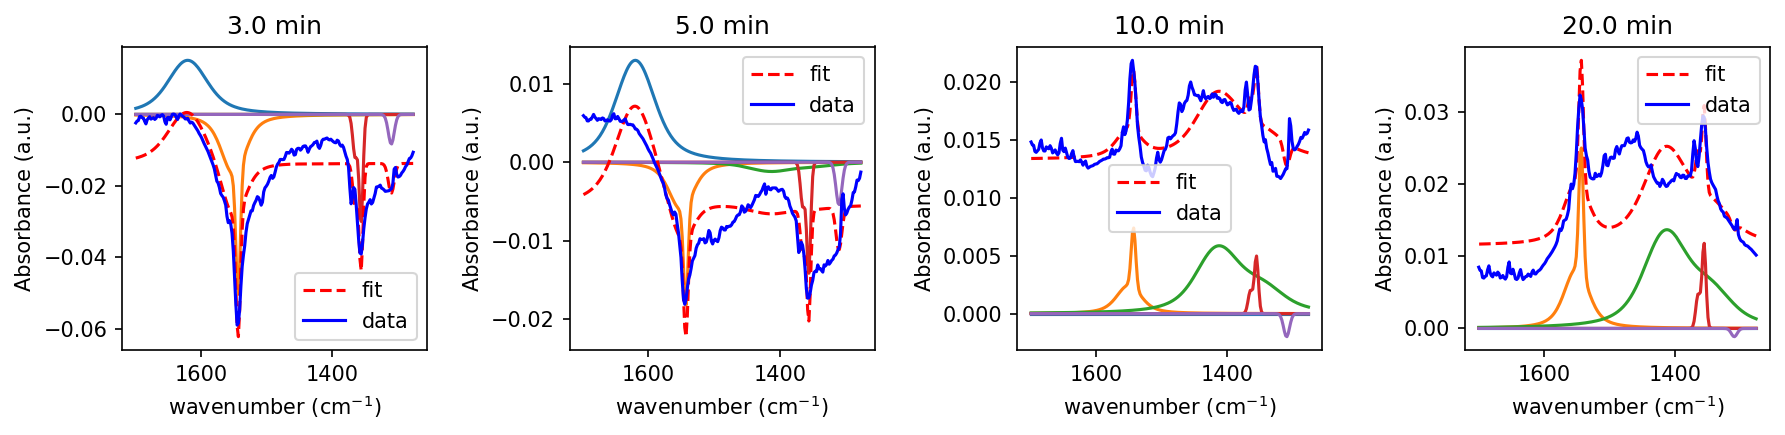

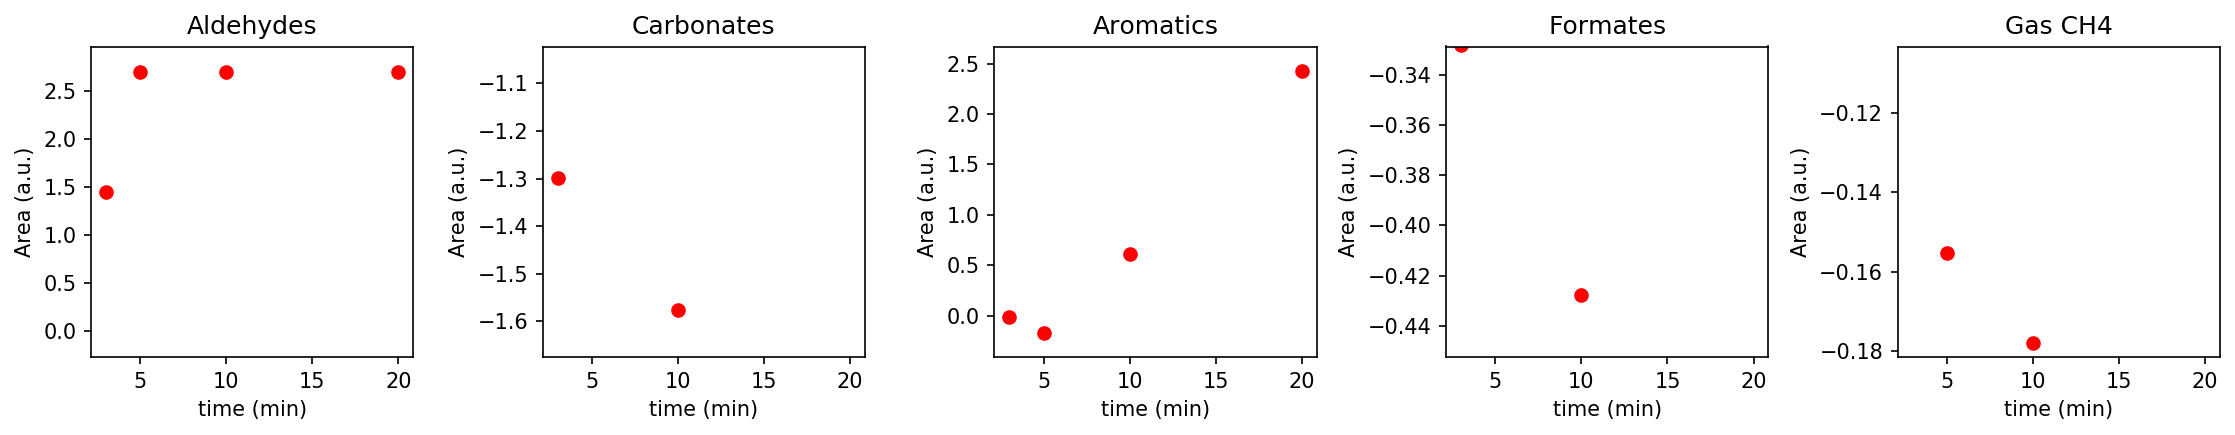

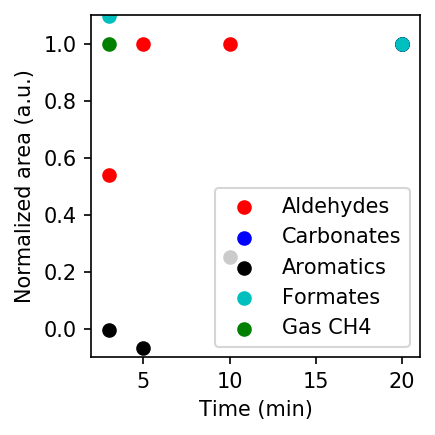

In [85]:
yhat_CC1 = Generate_data(new_params_CC1,x_CC,Vec_fit_CC1,ndata=ndata)
print('The R2 score of the fit is: {:.2f}'.format( r2_score(y_CC[nstart:nstart+ndata].flatten(), yhat_CC1.flatten())))
Plot_data(new_params_CC1,x_CC,y_CC[nstart:nstart+ndata],Vec_fit_CC1,Time[nstart:nstart+ndata],Vec_name_CC0,True)

### Fitting the Final Stage (180,720) min

We use postfix _CC2 for fitting of this period.

Below is an intial guess of the peaks.

In [86]:
Vec_IG_CC2 = {'Mus':np.array([1600, 1537.8, 1541.7, 1473.6, 1386, 1352, 1369.1, 1357.9, 1303.9]),
             'Sigmas':np.array([15.9, 4.4,18.7, 20, 18, 8.7, 2.4, 4, 2.37]),
             'Types':np.array([0,1,0,0,0,0,1,1,1]),
             'Fixed':None,#np.array([0,0,0,0,0,0,0,1,1,1]),
             'Lims':{'Positive':False,
                     'Mus_min':np.array([1595,1537., 1500., 1460, 1370,1330, 1300, 1330, 1300.]),
                    'Mus_max':None}
             }


In [92]:
t0 = time.time()
nstart = 8
ndata = 11
fit_params_IG2 = Generate_params_IG(x_CC,Vec_IG_CC2,ndata = ndata)
fitter = Minimizer(loss_func_IG, fit_params_IG2, fcn_args=(x_CC, y_CC[nstart:nstart+ndata], Vec_IG_CC2))
result = fitter.minimize(method='leastsq')
t1 = time.time() 

print('The time cost is:',t1-t0)

The time cost is: 576.7580909729004


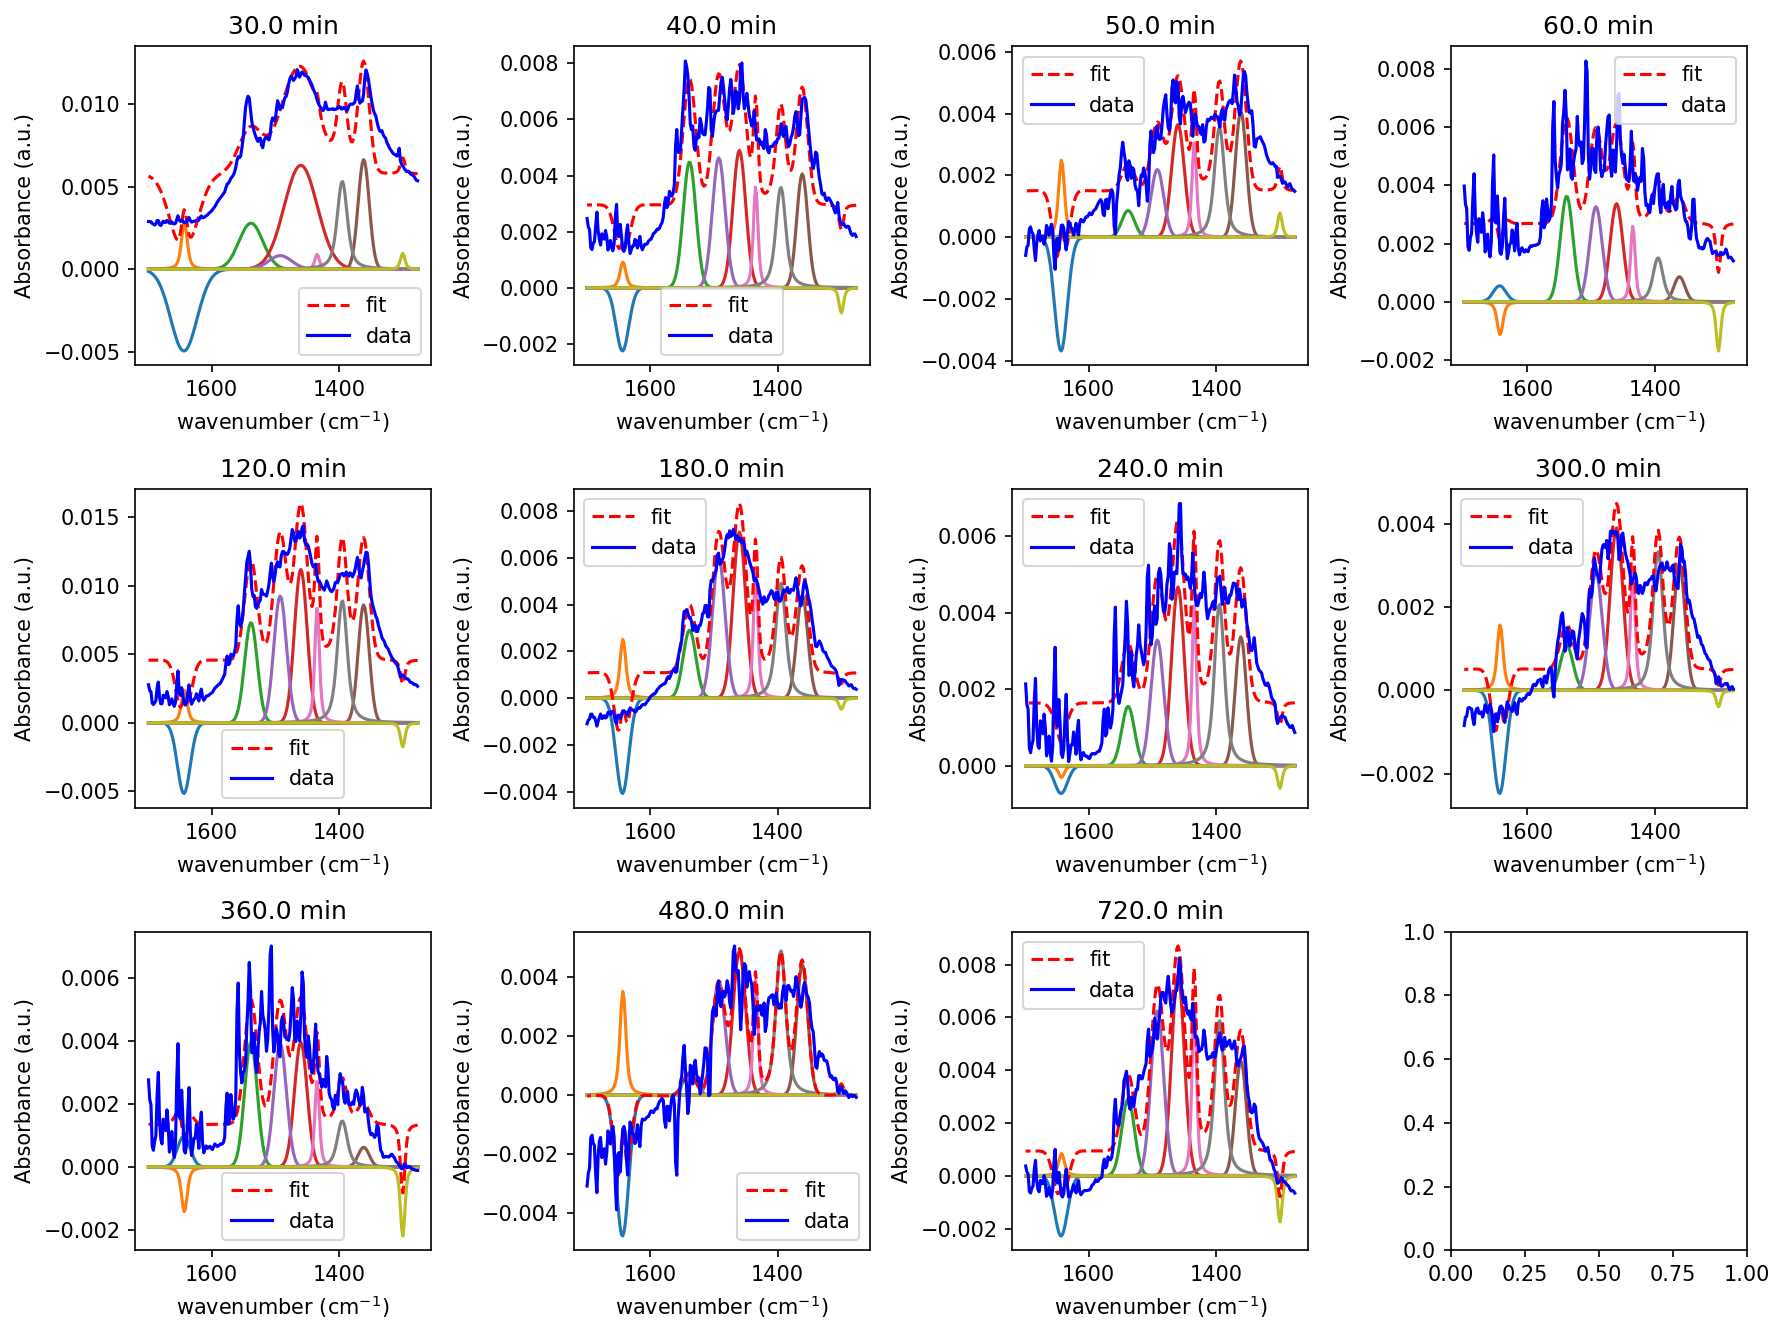

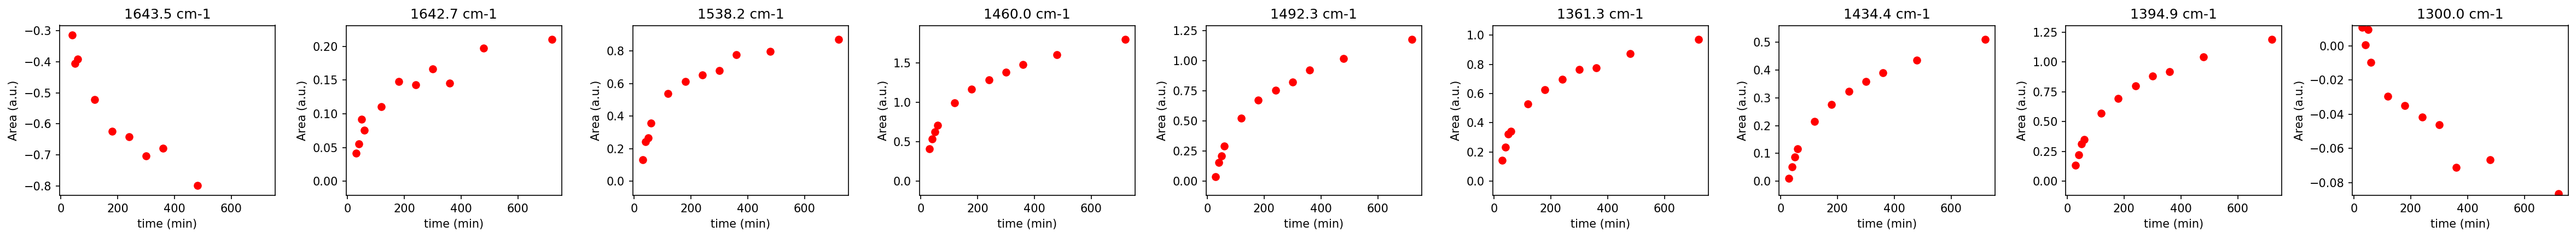

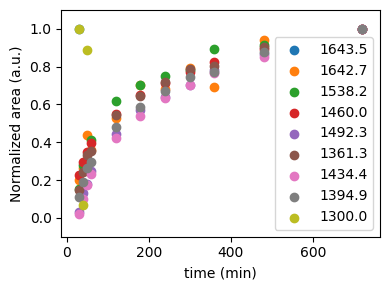

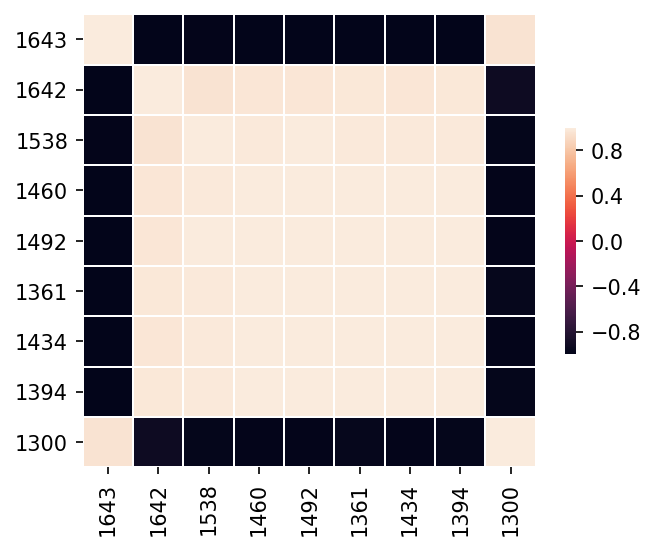

{'Peak Pos': [1643, 1642, 1538, 1460, 1492, 1361, 1434, 1394, 1300],
 'Amps': array([[-2.57001477e-01,  4.14752038e-02,  1.30811930e-01,
          4.10607536e-01,  3.71187467e-02,  1.44965173e-01,
          1.03669151e-02,  1.32877669e-01,  1.09452245e-02],
        [-3.13454336e-01,  5.50545501e-02,  2.43367711e-01,
          5.33455472e-01,  1.53316433e-01,  2.33596025e-01,
          5.19083002e-02,  2.22214819e-01,  7.53533656e-04],
        [-4.05623252e-01,  9.19601042e-02,  2.65076892e-01,
          6.24931233e-01,  2.08372095e-01,  3.22327544e-01,
          8.72691867e-02,  3.10837405e-01,  9.71758793e-03],
        [-3.91878069e-01,  7.52513929e-02,  3.56114814e-01,
          7.09509120e-01,  2.90304108e-01,  3.41075335e-01,
          1.17339370e-01,  3.48514000e-01, -9.56610807e-03],
        [-5.20949068e-01,  1.10381488e-01,  5.39199289e-01,
          9.89811059e-01,  5.21954051e-01,  5.28610359e-01,
          2.13879397e-01,  5.70578858e-01, -2.94236933e-02],
        [-6.232867

In [93]:
params_IG2 = result.params
Plot_data_IG(params_IG2,x_CC,y_CC[nstart:nstart+ndata],Vec_IG_CC2,Time[nstart:nstart+ndata],True)

In [96]:
Vec_fit_CC2 = Generate_Vec_IG(params_IG2,Vec_IG_struc_CC,ndata)

In [100]:
t0 = time.time()
nstart = 8
ndata = 11
Vec_fit_CC2['Alphas'] = None
#Vec_fit_CC2['Vec0']['Lims'] = {'Peaks':np.array([0]),'Specs':np.array([[0],[1610],[10],[20],[0]]),'Pos':None}
Vec_fit_CC2['Vec1']['Lims'] = {'Peaks':np.array([0,1]),'Specs':np.array([[1500,1410],[1700,1580],[1.2,0.1],[7.5,25],[0,0]]),'Pos':None}
Vec_fit_CC2['Vec2']['Lims'] = {'Peaks':np.array([0,1,2]),'Specs':np.array([[0,0,0],[4000,4000,4000],[0.1,0.1,0.1],[25,25,25],[0,0,0]]),'Pos':None}
Vec_fit_CC2['Vec3']['Lims'] = {'Peaks':np.array([0,1]),'Specs':np.array([[1355,1355],[1370,1370],[0.1,0.1],[5,5],[-0,0]]),'Pos':None}

fit_params_CC2 = Generate_params(x_CC,Vec_fit_CC2,ndata=ndata)

fitter = Minimizer(loss_func, fit_params_CC2, fcn_args=(x_CC, y_CC[nstart:nstart+ndata], Vec_fit_CC2))
result = fitter.minimize(method='leastsq')
t1 = time.time() 

print('The time cost is:',t1-t0)

0 20.669998715394655 5.669998715394655 35.669998715394655
0 1643.4890590371954 1613.4890590371954 1673.4890590371954
1 3.0800000000001106 1.2 6.5
1 1642.709098034255 1637.709098034255 1647.709098034255
1 18.7 3.6999999999999993 25.0
1 1538.2197998137733 1508.2197998137733 1568.2197998137733
2 25.999999999995808 10.999999999995808 25.0
2 1460.0000000000005 1430.0000000000005 1490.0000000000005
2 18.0 3.0 25.0
2 1492.315607590355 1462.315607590355 1522.315607590355
2 8.7 0.1 23.7
2 1361.297805537673 1331.297805537673 1391.297805537673
3 2.4 0.1 5.0
3 1434.3878147496239 1429.3878147496239 1370.0
3 5.199999999999976 0.1999999999999762 5.0
3 1394.9174585072983 1389.9174585072983 1370.0
4 2.37 0.1 7.37
4 1300.03185715366 1295.03185715366 1305.03185715366
The time cost is: 13.653150081634521


In [101]:
new_params_CC2 = result.params

The R2 score of the fit is: 0.95
Plotting.....


Aldehydes  Carbonates  Aromatics  Formates   Gas CH4
0   -1.286225    0.026671   0.116704  0.017060 -0.083264
1   -1.372839    0.294916   0.995432  0.016298 -0.085141
2   -1.719366    0.265674   1.498169  0.016775 -0.091681
3   -1.500941    0.557475   2.188960  0.014996 -0.084732
4   -1.745898    0.966434   4.084272  0.022817 -0.094735
5   -1.927599    1.129887   5.237020  0.016982 -0.094151
6   -1.982553    1.202263   6.038559  0.026593 -0.096793
7   -2.123168    1.237973   6.652010  0.031656 -0.104550
8   -1.814541    1.570739   7.455051  0.026067 -0.098101
9   -2.159280    1.554255   8.199203  0.033028 -0.106162
10  -2.148208    1.743941   9.546093  0.041612 -0.112126

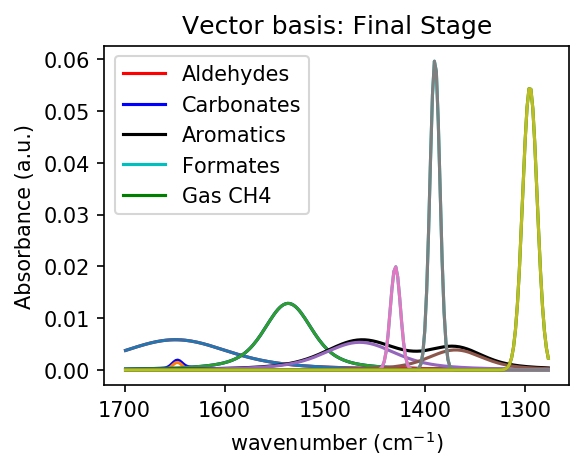

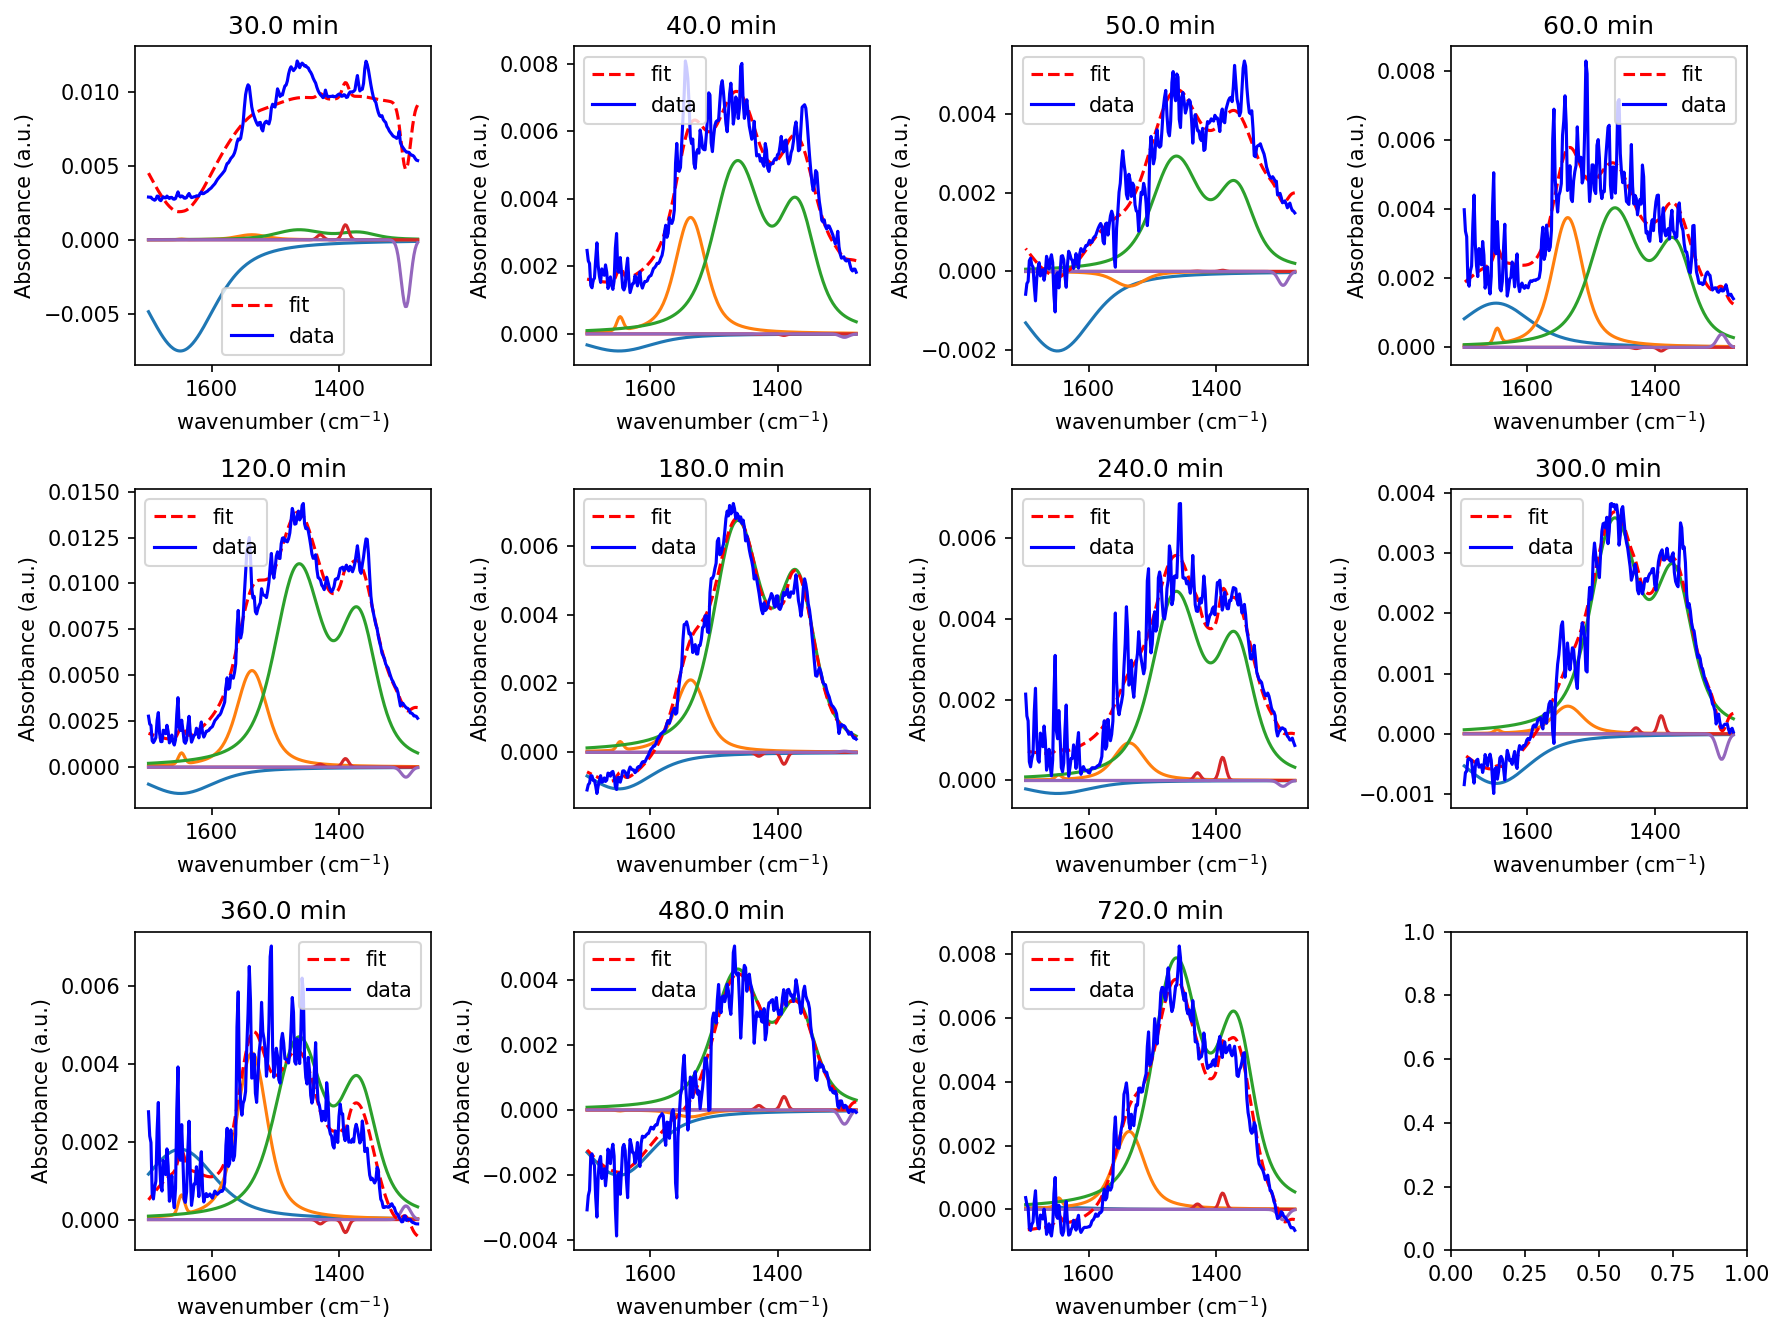

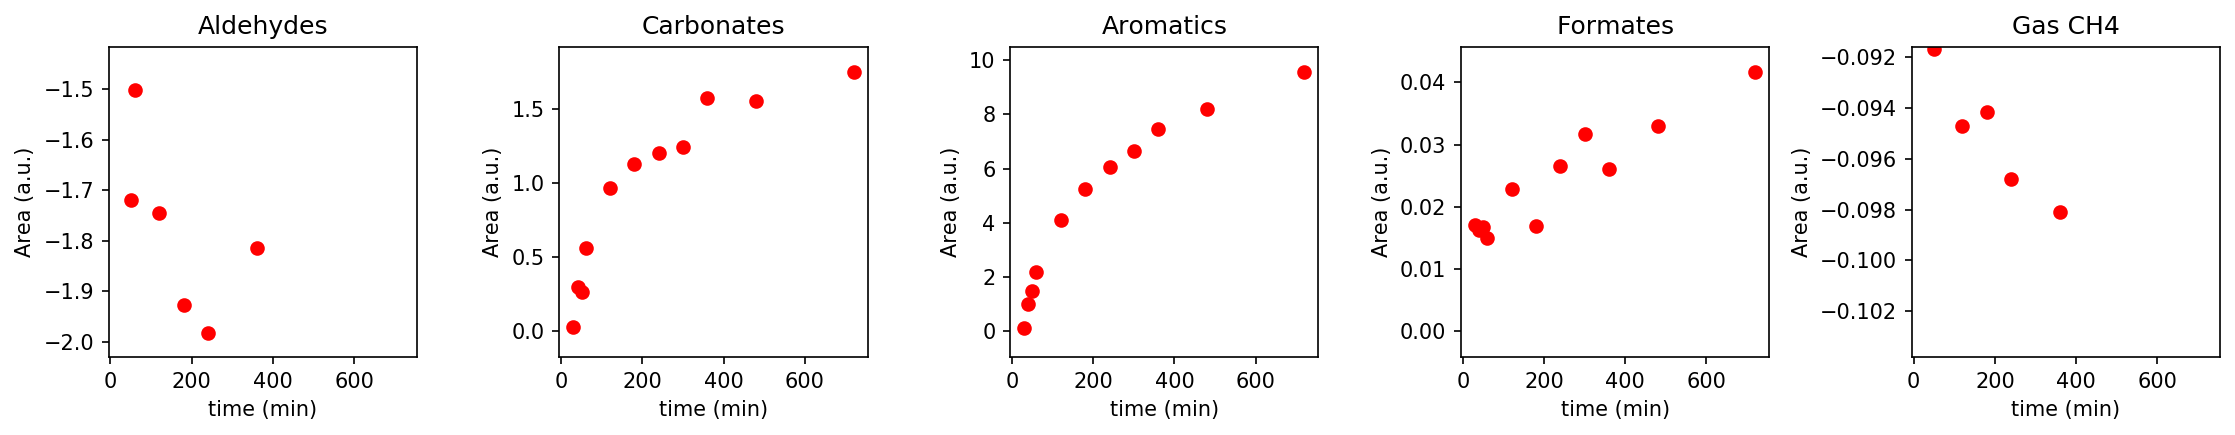

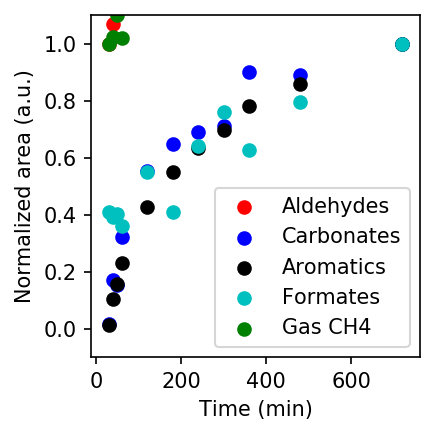

In [102]:
yhat_CC2 = Generate_data(new_params_CC2,x_CC,Vec_fit_CC2,ndata=ndata)
print('The R2 score of the fit is: {:.2f}'.format( r2_score(y_CC[nstart:nstart+ndata].flatten(), yhat_CC2.flatten())))
Plot_data(new_params_CC2,x_CC,y_CC[nstart:nstart+ndata],Vec_fit_CC2,Time[nstart:nstart+ndata],Vec_name_CC0,True)

### Combine the three Stages Together

Now, we want to evaluate the evolution of different species over the entire experiment period through combining the three stages together. 

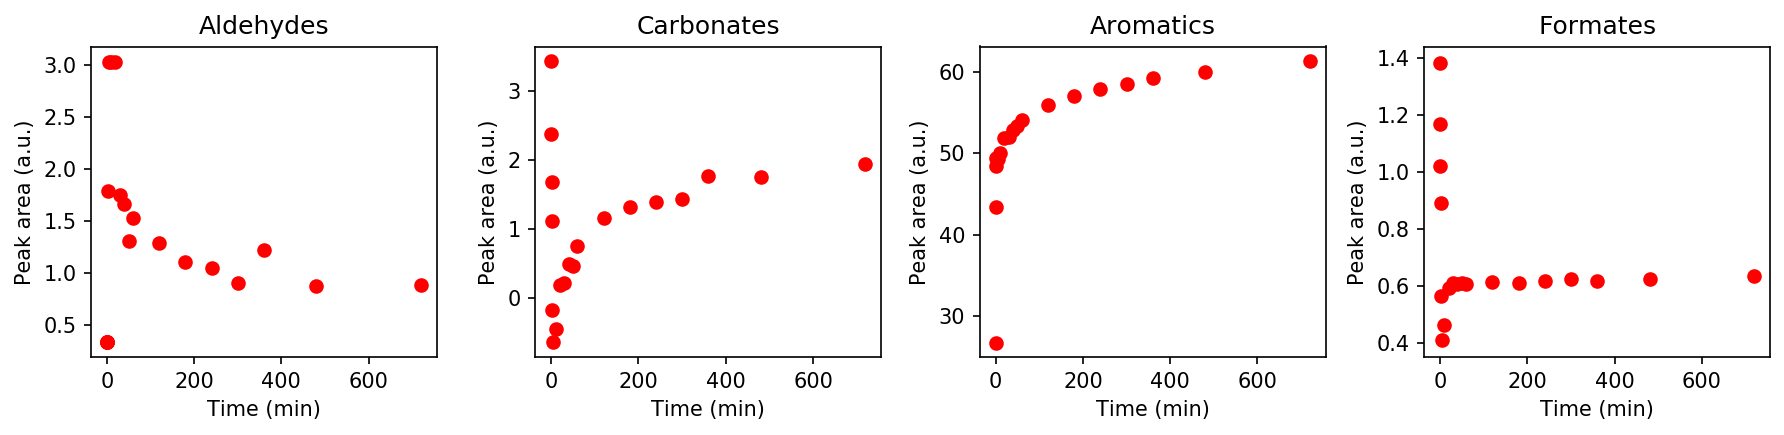

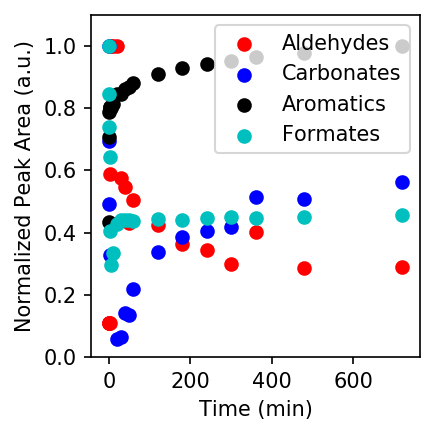

In [104]:
Param_com = {'Params': (new_params_CC0,new_params_CC1,new_params_CC2) ,
            'Lens':np.array([4,4,11])}
Param_com_IG = {'Params': (params_IG,params_IG1,params_IG2) ,
            'Lens':np.array([4,4,11])}

#Plot_com_data_IG(Param_com_IG,Vec_IG_CC0,Time,True)
data_CC = Plot_com_data(Param_com,Vec_IG_struc_CC,Time,Vec_name_CC0,True)

## Fitting the 1000 - 1300 cm$^{-1}$ region

This region contains charistic peaks from C-O speices. 

In [105]:
Vec_IG_CO = {'Mus':np.array([1058.8, 1085.9]),
          'Sigmas':np.array([15.8,7.6]),
          'Types':np.array([1,1]),
          'Lims':None}



In [106]:
t0 = time.time()
fit_params_IG_CO = Generate_params_IG(x_CO,Vec_IG_CO,ndata =19)

fitter = Minimizer(loss_func_IG, fit_params_IG_CO, fcn_args=(x_CO, y_CO, Vec_IG_CO))
result = fitter.minimize(method='leastsq')
t1 = time.time() 

print('The time cost is:',t1-t0)

The time cost is: 1.7830181121826172


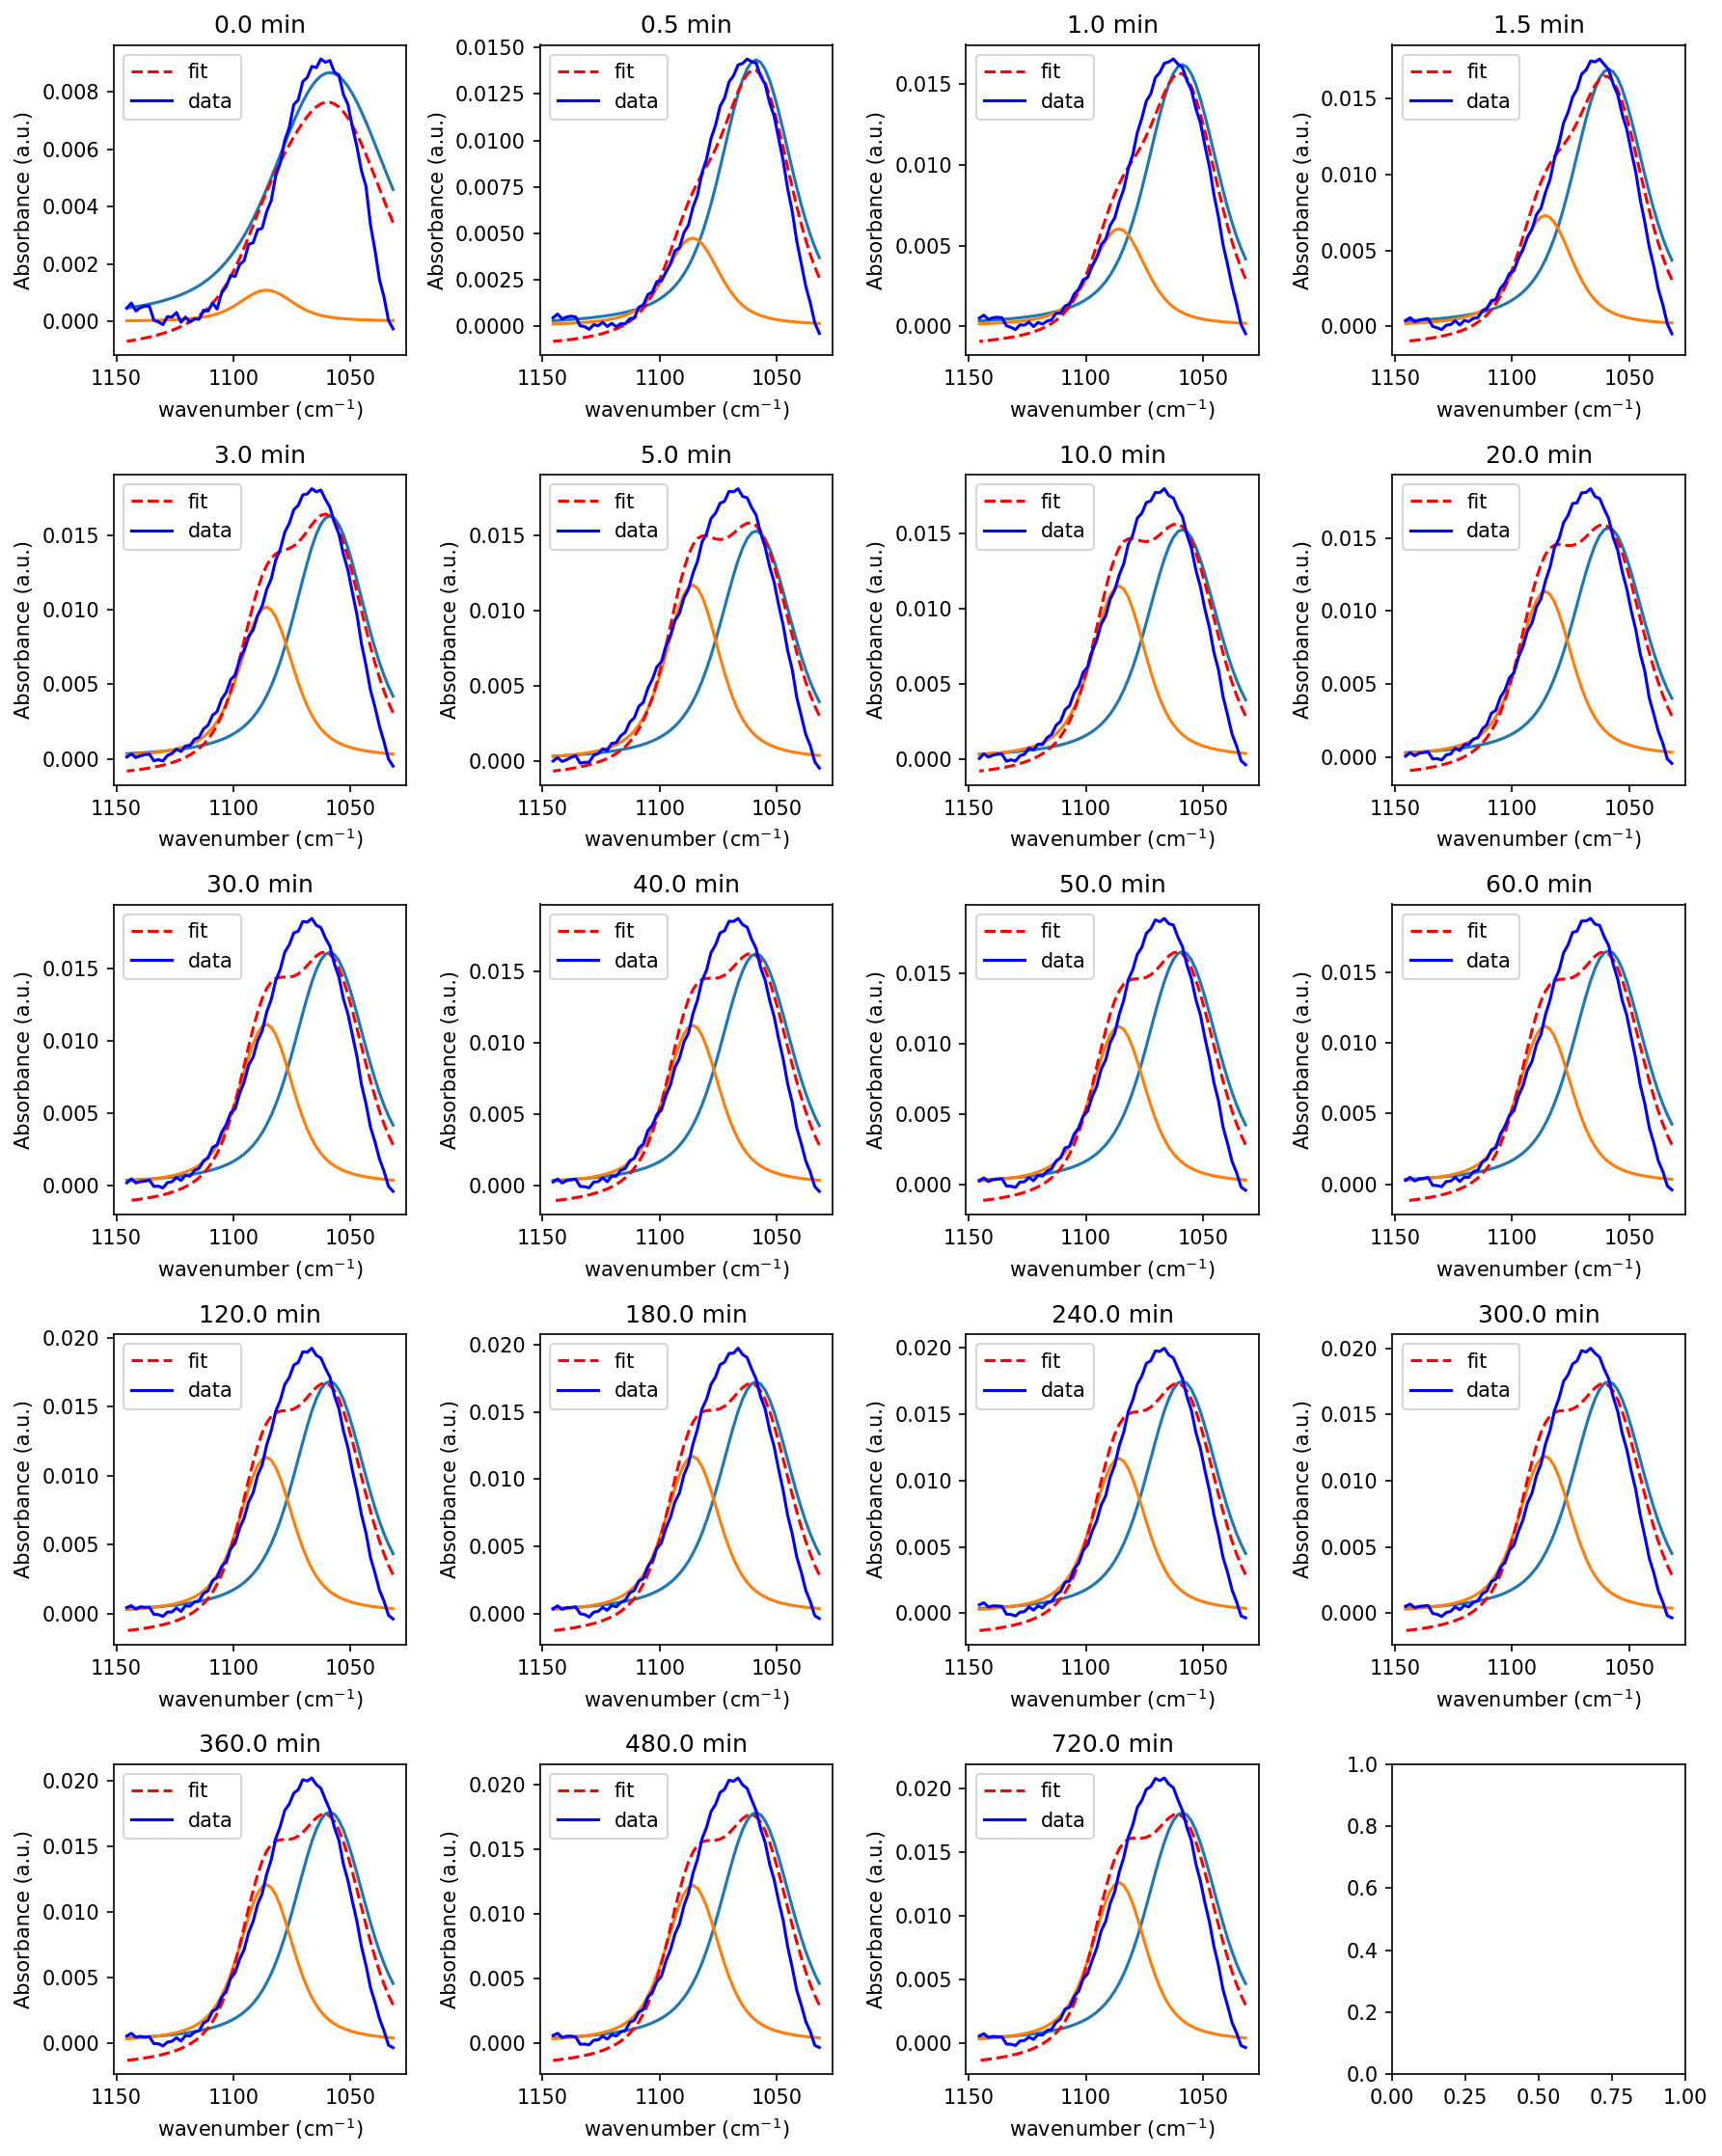

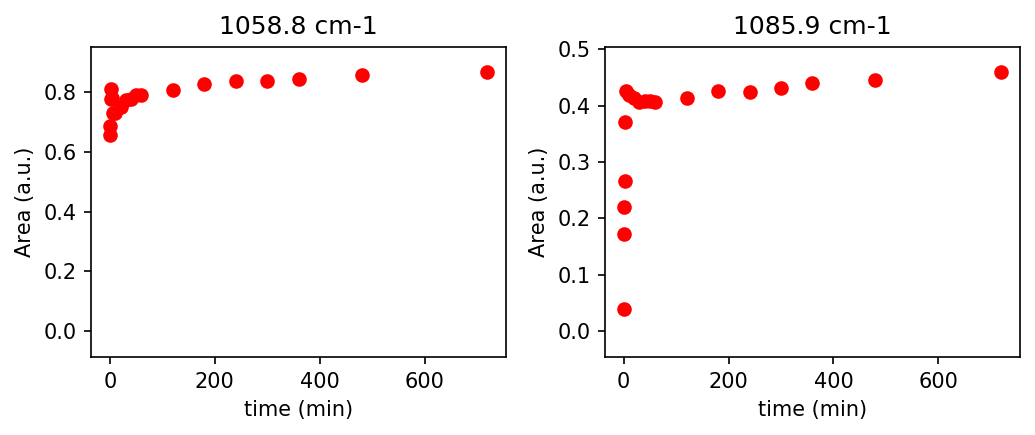

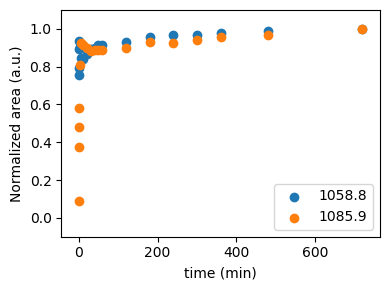

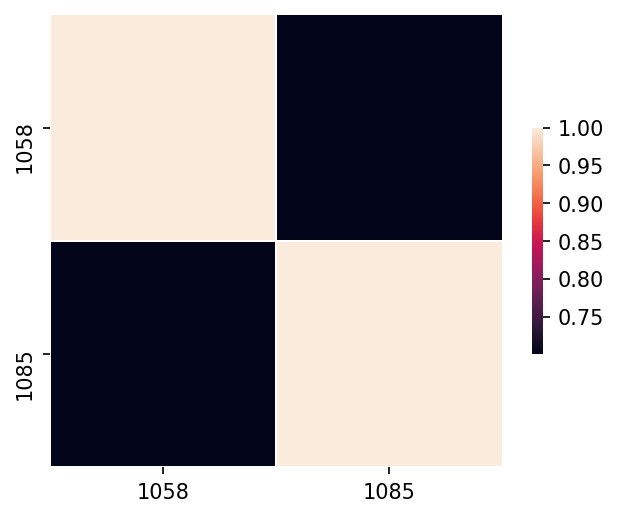

{'Peak Pos': [1058, 1085], 'Amps': array([[0.65633437, 0.03981709],
        [0.68664546, 0.17267263],
        [0.775495  , 0.21974928],
        [0.81105794, 0.26589721],
        [0.78192541, 0.37133693],
        [0.73125746, 0.42516634],
        [0.72975775, 0.41858165],
        [0.75135902, 0.41300843],
        [0.77367076, 0.40614907],
        [0.77761498, 0.40861335],
        [0.79100259, 0.40818658],
        [0.79086524, 0.40707945],
        [0.80726685, 0.41308837],
        [0.82704756, 0.42646281],
        [0.83690101, 0.42423357],
        [0.83745419, 0.43081211],
        [0.84508393, 0.4403082 ],
        [0.85565001, 0.4446787 ],
        [0.86598437, 0.45884137]])}

In [107]:
params_IG_CO = result.params
Plot_data_IG(params_IG_CO,x_CO,y_CO,Vec_IG_CO,Time,False)

In [110]:
Vec_IG_struc_CO = {'Peaks':[[0],[1]],'Types':[[0],[1]]}
Vec_fit_CO = Generate_Vec_IG(params_IG_CO,Vec_IG_struc_CO,19)
#Vec_fit['Vec0']['Lims'] = {'Peaks':np.array([0,1,2,3]),
 #                          'Specs':np.array([[0.1,0.1,0.1,0.1],
 #                                           [4000,4000,4000,4000],
 #                                           [0.1,.1,0.1,0.1],
  #                                          [6.5,6.5,6.5,6.5]])}



In [111]:
t0 = time.time()
Vec_fit_CO['Alphas'] = None
Vec_fit_CO['Vec0']['Lims'] = {'Peaks':np.array([0]),
                               'Specs':np.array([[0],[1090],[7],[20],[0]]),
                               'Pos':[True]}
Vec_fit_CO['Vec1']['Lims'] = {'Peaks':np.array([0]),
                               'Specs':np.array([[1005],[4000],[7],[20],[0]]),
                               'Pos':[True]}
fit_params_CO = Generate_params(x_CO,Vec_fit_CO,ndata = 19)

fitter = Minimizer(loss_func, fit_params_CO, fcn_args=(x_CO, y_CO, Vec_fit_CO))
result = fitter.minimize(method='leastsq')
t1 = time.time()

print('The time cost is:',t1-t0)

0 15.8 10.8 6.5
0 1058.8 1053.8 1063.8
1 7.6 7 20
1 1085.9 1055.9 1115.9
The time cost is: 5.299240827560425


In [112]:
new_params_CO = result.params

The R2 score of the fit is: 0.99
Plotting.....


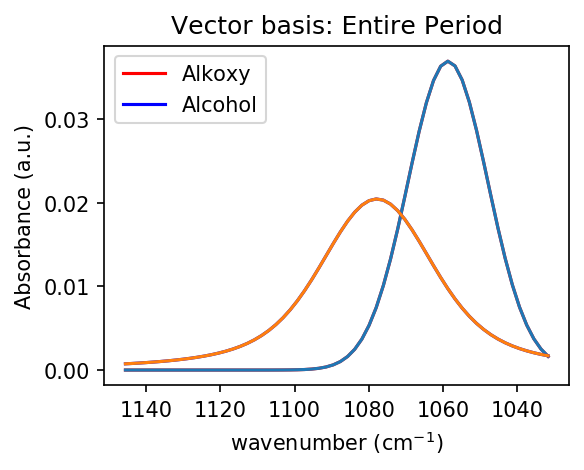

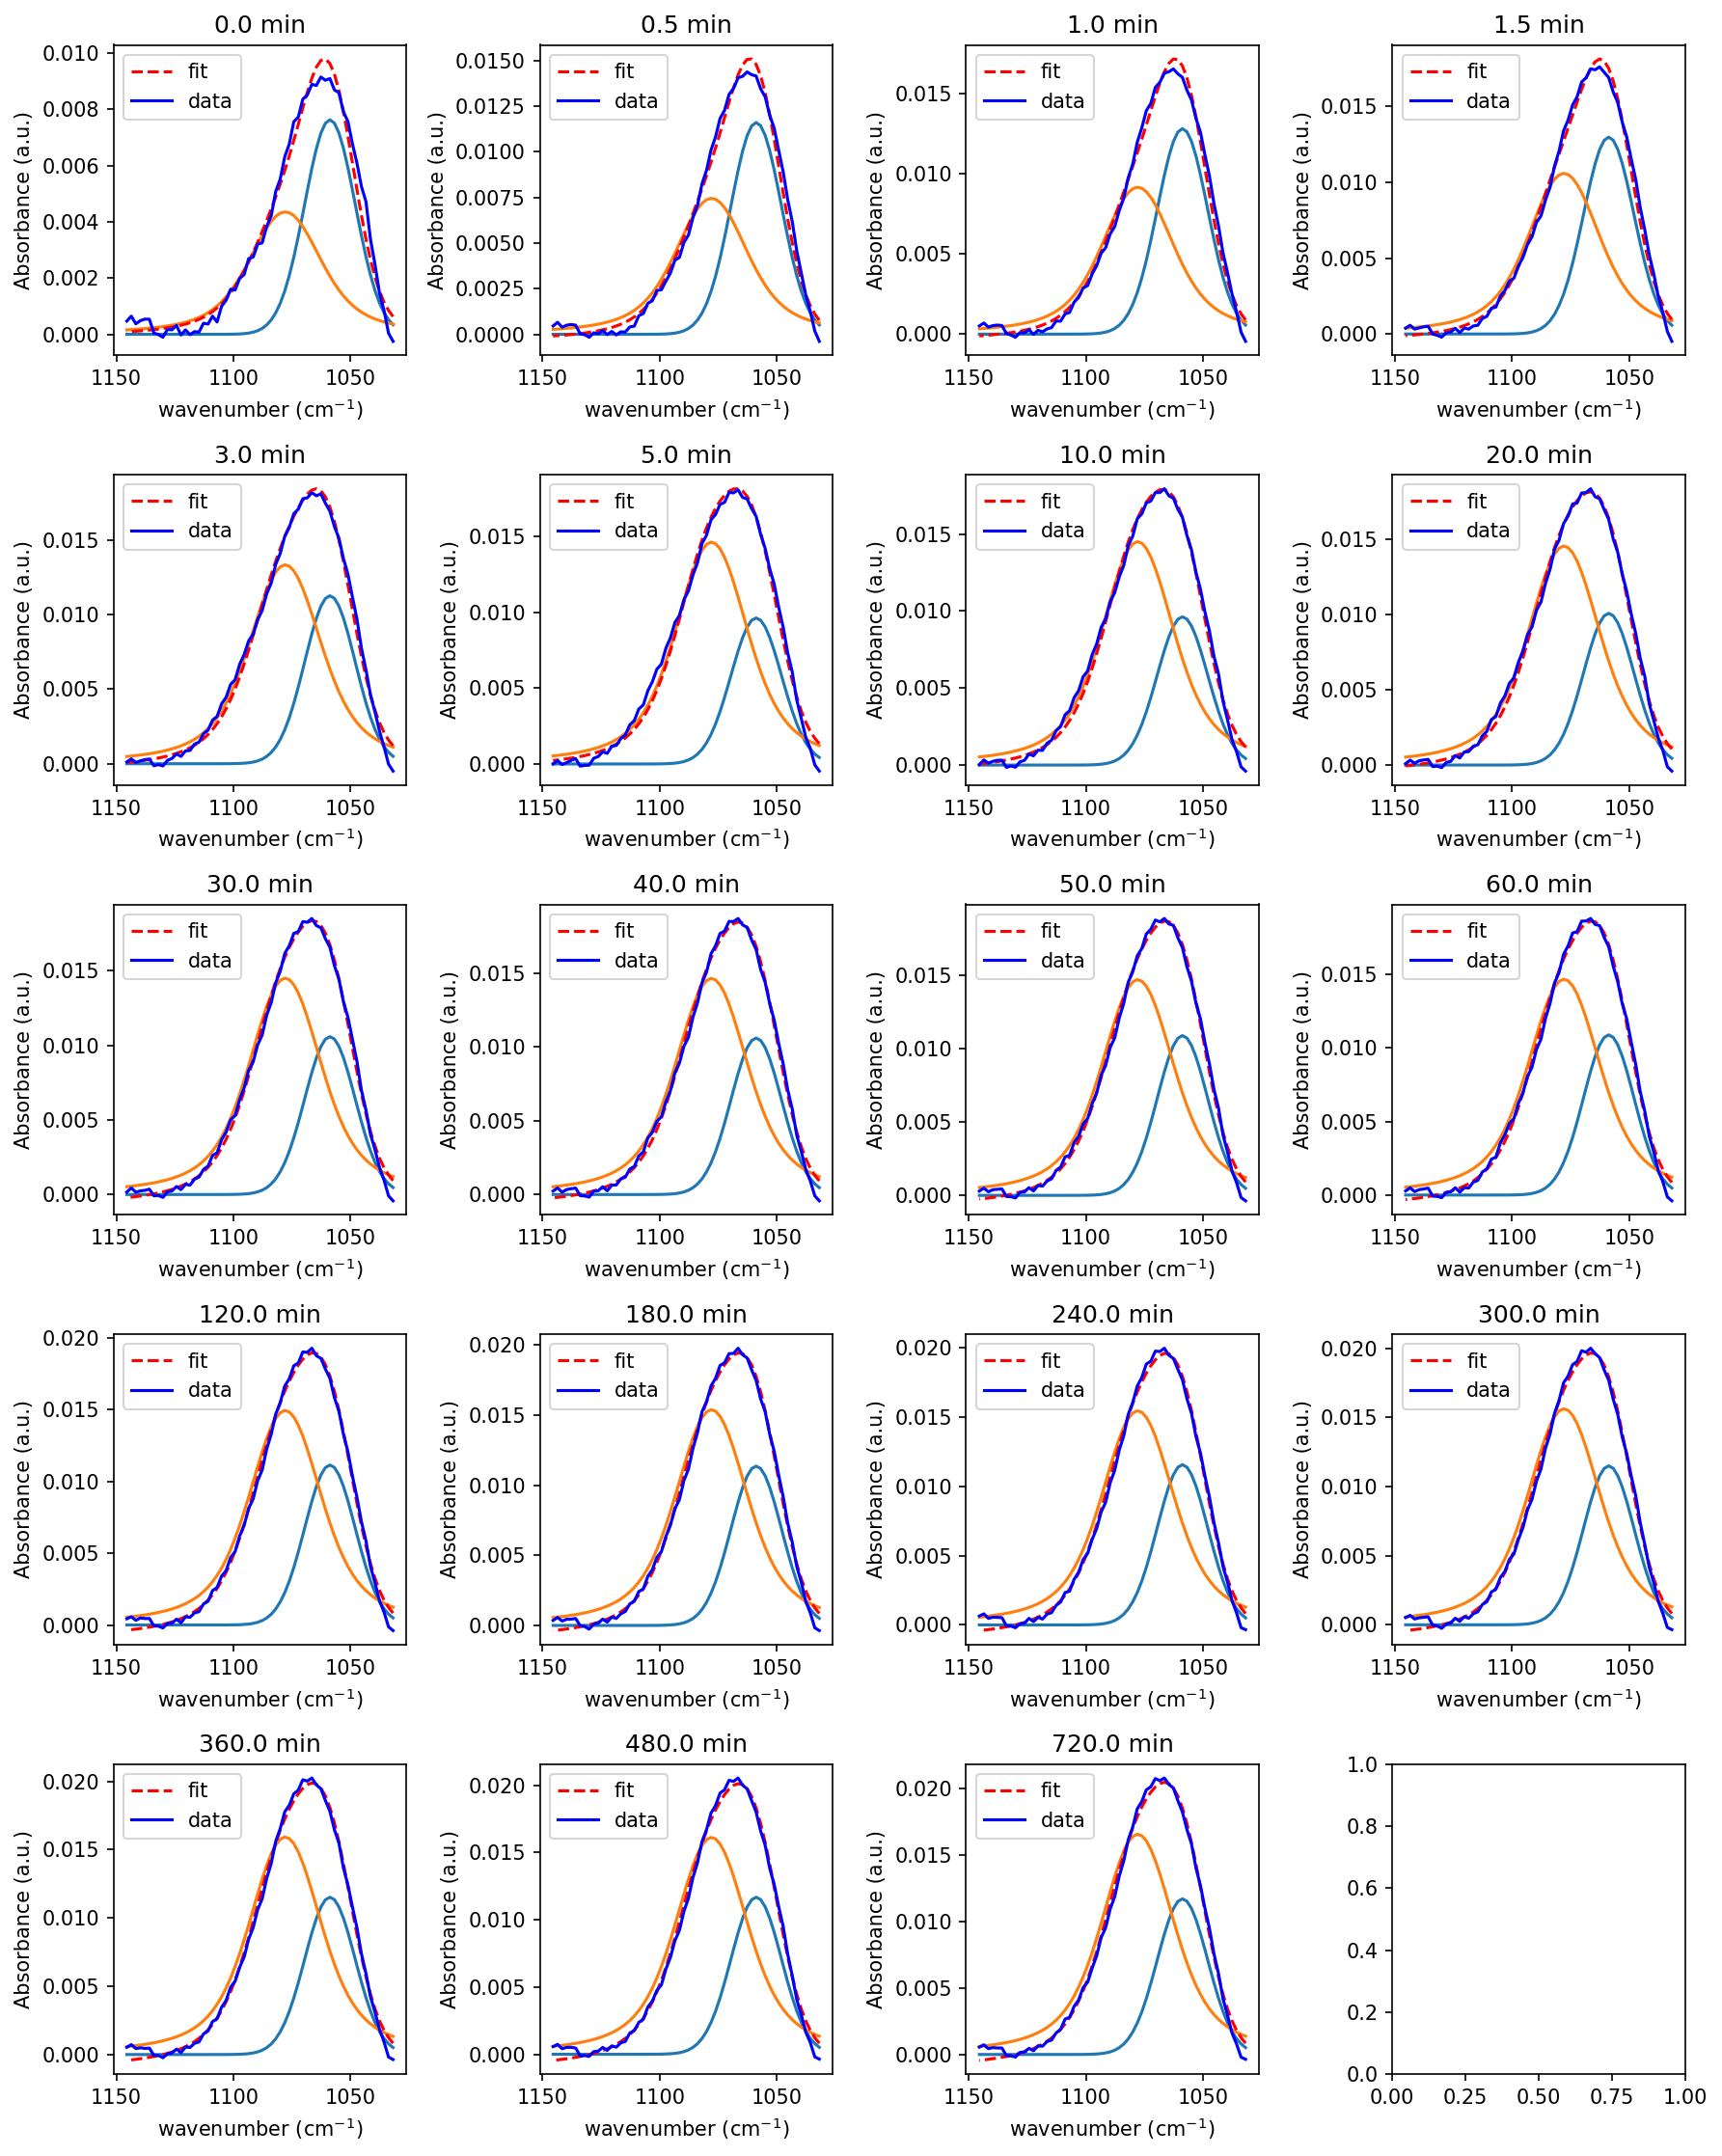

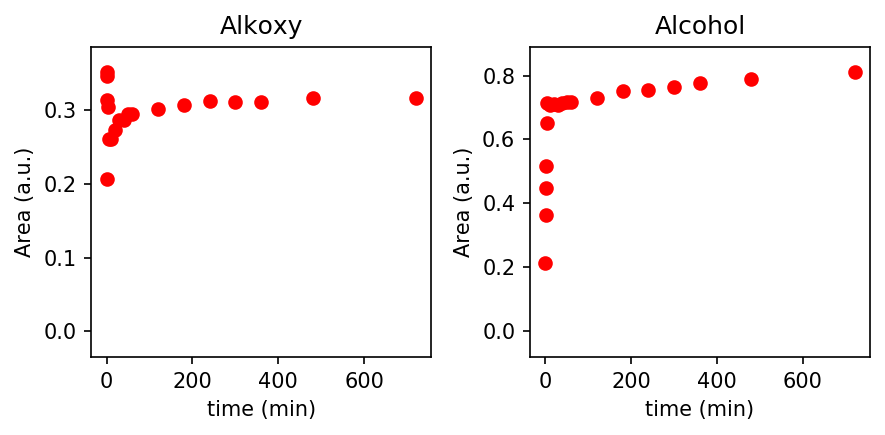

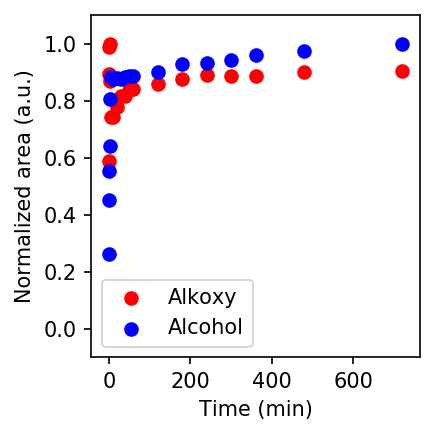

In [113]:
Vec_name_CO = ['Alkoxy','Alcohol']
yhat_CO = Generate_data(new_params_CO,x_CO,Vec_fit_CO,ndata=19)
print('The R2 score of the fit is: {:.2f}'.format(r2_score(y_CO.flatten(), yhat_CO.flatten())))
data_CO = Plot_data(new_params_CO,x_CO,y_CO,Vec_fit_CO,Time,Vec_name_CO,False)

In [116]:
Final_combined_params = {'CH': data_CH,
                         'CC': data_CC,
                         'CO': data_CO,
                         'Time':pd.DataFrame(Time,columns=['Time'])}
Final_list = [[1,3,5],[4],[2,7,8]]
Plot_name = ['Formates and Carbonates','Aromatics','Aldehydes and Alkoxys']

In [124]:
data_CC['Carbonates'] = data_CC['Carbonates']-5
data_CC['Formates'] = data_CC['Formates']+1
print(data_CC)

    Aldehydes  Carbonates  Aromatics  Formates   Gas CH4
0    0.334469    8.435194  26.668507  3.381968  0.202508
1    0.334499    7.386561  43.395164  3.167121  0.288011
2    0.334499    6.687860  48.429031  3.021357  0.273517
3    0.334966    6.124609  49.455902  2.889709  0.233649
4    1.785710    4.826448  49.444583  2.561865  0.139653
5    3.028535    4.356925  49.288201  2.407253  0.078353
6    3.028535    4.548199  50.066401  2.461777  0.055729
7    3.028535    5.195125  51.883143  2.591074  0.042743
8    1.742310    5.221796  51.999848  2.608134 -0.040520
9    1.655696    5.490041  52.878576  2.607372 -0.042398
10   1.309170    5.460799  53.381313  2.607849 -0.048938
11   1.527594    5.752600  54.072103  2.606070 -0.041989
12   1.282637    6.161559  55.967415  2.613891 -0.051992
13   1.100936    6.325012  57.120163  2.608056 -0.051408
14   1.045982    6.397388  57.921702  2.617667 -0.054050
15   0.905367    6.433098  58.535153  2.622730 -0.061806
16   1.213994    6.765864  59.3

In [128]:
data_CC['Aldehydes'] = (data_CC['Aldehydes']+5)/2

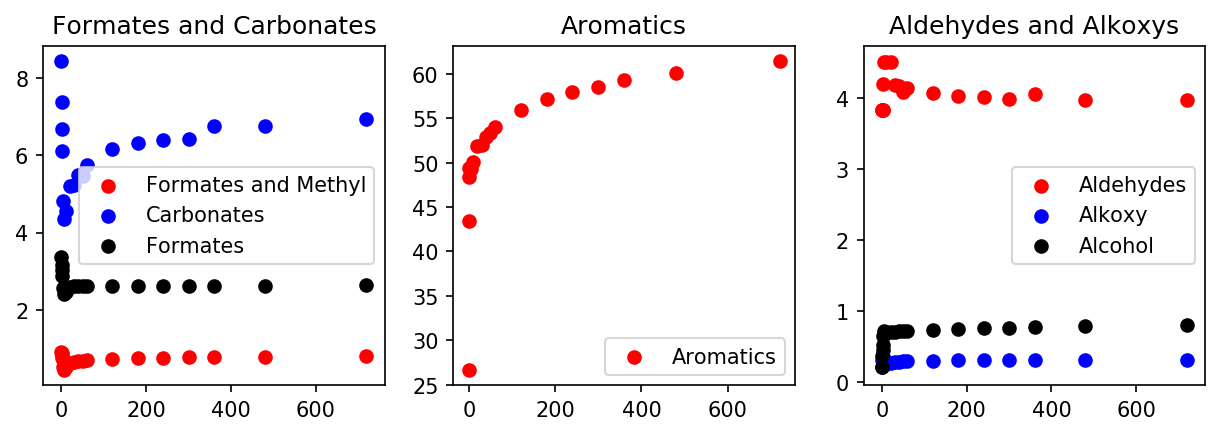

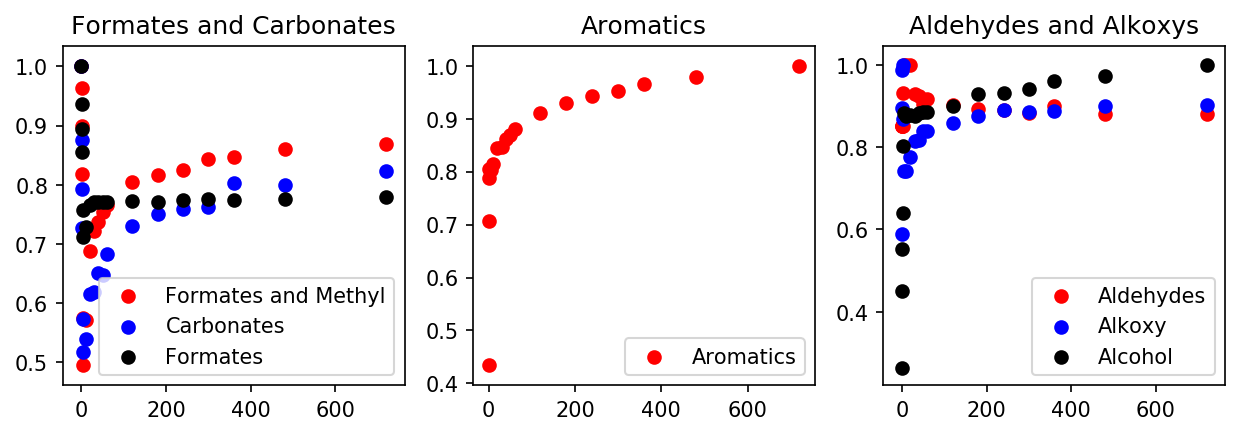

In [129]:
Final_plot(Final_combined_params, Final_list, Plot_name)

In [112]:
Print_var(new_params_CO,np.array(['Alkoxy\t','Alkoxy2\t']),Vec_IG_struc_CO)

Species		Type		Peak (cm-1)	error(%)	Variance (cm-1)	error(%)
Alkoxy		Gaussian	1221.1		0.23495111094409377		19.4		0.30779604319929077
		Voigt		1077.3		1.5536586225981346		5.6		1.4583973128098002
Alkoxy2		Voigt		1084.1		1.6085294308425742		11.4		1.1863452510005161


In [247]:
Vec_assign = np.array([['Asy C-H','Asy C-H', 'Sym C-H', 'Sym C-H']])
Vec_assign_CC = np.array([['Alde C=O'],['O-C-O','Carbonyl'],
                          ['Aro1', 'Aro2', 'Aro3'],['Sym C=O','Asym C=O'],['Vib']])
Vec_assign_CO = np.array([['C-O1'],['C-O2']])

Final_peak_params = {'CH':{'Multi-stage':False,
                           'Params':new_params,
                           'Vec': Vec_IG_struc,
                           'Name':Vec_name,
                           'Assignment':Vec_assign},
                     'CC':{'Multi-stage':True,
                           'Params':[new_params_CC0,new_params_CC1,new_params_CC2],
                           'Vec': Vec_IG_struc_CC,
                           'Name':Vec_name_CC0,
                           'Assignment':Vec_assign_CC},
                     'CO':{'Multi-stage':False,
                           'Params':new_params_CO,
                           'Vec': Vec_IG_struc_CO,
                           'Name':Vec_name_CO,
                           'Assignment':Vec_assign_CO}}
Final_print(Final_peak_params)

Species		Vibrational			Peak
		Modes		Stage		Type		Position	Variance)	Relative Amplitude
								(cm-1)		(cm-1)		(a.u.)
Formates and Methyl	Asy C-H		All period	Voigt		2842.3		3.3		1.00
		Asy C-H				Voigt		2851.9		5.5		2.13
		Sym C-H				Voigt		2929.5		5.6		2.03
		Sym C-H				Voigt		2958.4		1.7		0.26
Aldehydes	Alde C=O	Initial		Voigt		1605.0		13.4		1.00
				Middle		Voigt		1620.0		20.0		1.00
				Final		Voigt		1664.7		35.3		1.00
Carbonates	O-C-O	Initial		Gaussian	1545.0		4.4		1.00
				Middle		Gaussian	1542.8		5.7		1.00
				Final		Gaussian	1543.9		6.5		1.00
		Carbonyl	Initial		Voigt		1530.0		20.2		6.89
				Middle		Voigt		1550.0		20.0		5.49
				Final		Voigt		1516.6		25.0		10.74
Aromatics	Aro1	Initial		Voigt		1480.4		22.4		1.00
				Middle		Voigt		1470.8		12.0		1.00
				Final		Voigt		1440.4		25.0		1.00
		Aro2	Initial		Voigt		1400.1		25.0		0.82
				Middle		Voigt		1430.0		22.0		2.98
				Final		Voigt		1460.9		20.9		20.13
		Aro3	Initial		Voigt		1341.3		24.4		1.00
				Middle		Voigt		1310.0		22.0		-2.